# The Second Part of the Assignment of IDS 2019-2020
Document your results as well as the way you obtained them in this jupyter notebook. Separate reports (pdf, word, etc.) are _not_ required. However, it is necessary that you provide the python code leading to your results as well as textual answers to the assignment questions in this notebook. *DO NOT CLEAR THE OUTPUT of the notebook you are submitting!* In the cases that the result of an algorithm is pdf, jpg, etc, you should attach the result to this notebook file and refer to that in the text.  

Next to the jupyter notebook, submit one zip-file containing all data sets that you are asked to submit. Make sure they are easily identifiable, i.e. use names as requested in the corresponding question.

Do not change the general structure of this notebook, but you can add further markdown or code cells to explain your solutions if necessary. In the end, submit this file and your created data sets in moodle.

Only <font color="red">one </font> group member should upload your group's solution.*Make sure to include group members' names and matriculation numbers*. If your name and student id are not included in the report, you will not receive any points!


Hint 1: While answering the questions, you will get a better and better impression of the given data. <font color="red"><b>Ensure that all claims you make are supported by the presented facts!</b></font>

Hint 2: <font color="red"><b>Some of the tasks might need some time to run. Take this into account in your planning.</b></font>

Hint 3: RWTHonline allows for multiple submissions (each submission overwrites the previous ones). <font color="red"><b>Partial submissions are possible and encouraged. </b></font> This helps in case of technical problems of RWTHonline, which do seldomly happen.

<font color="red"><b>Student Names and IDs:
1. Romayssa
2. Moncef


In [3]:
# Global lib imports

import pandas as pd
import numpy as np
import scipy as scp
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import random
import csv
from prettytable import PrettyTable
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from tqdm import tqdm
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import multiprocessing
cores = multiprocessing.cpu_count()

## Preprocessing of the Dataset (5 points)

The provided data set *air_pollution* contains hourly results of measuring the concentration of certain substances (CO, Benzene, NO2, particulate matter) and environmental conditions (temperature, relative humidity, traffic volume). This data was collected near a busy street in a city center by an automated device.

 You should carry out some preprocessing steps before starting the analysis:
 - Select 90% of 'air_pollution' dataset by random sampling. Use one of the group member's student number as a seed.
 - After completing this preprocessing step, export your final dataset as 'air_pollution_2.csv' dataset and use that for the next steps of the assignment.
 - If it is not directly mentioned, you should always use your extracted (above-created) dataset.
 - <font color='red'>Important!</font> Make sure that you submit your extracted dataset with your result in moodle.

In [3]:
#your code
air_pollution_data = pd.read_csv("air_pollution.csv")
air_pollution_data = air_pollution_data.sample(frac=0.9,random_state=403758)
# air_pollution_data.to_csv("air_pollution_2.csv")

## Question 1 - Data Preprocessing and Data Quality (10 points)

For this question, use the extracted data set you created in the preprocessing step ('air_pollution_2.csv'), but without the features *Traffic_Volume* and *Particulate_Matter*. Remove those columns before answering the questions.

In [4]:
air_pollution_data = pd.read_csv("air_pollution_2.csv",index_col=0).reset_index(drop=True)
air_pollution_data_q1 = air_pollution_data[[i for i in air_pollution_data.columns if i not in ["Traffic_Volume","Particulate_Matter"]]].copy()
air_pollution_data_q1

Date      Time     CO  Benzene  NO2  Temperature  Humidity(%)
0     01.04.04   1:00:00    1.2      5.1   70         11.5         63.9
1     01.07.04  23:00:00    2.5     14.3  120         26.8         45.1
2     21.02.05  16:00:00    1.9      8.6  181          7.0         73.7
3     24.02.05  21:00:00    3.5     14.1  262          6.0         78.0
4     13.05.04  20:00:00    4.6     21.2  141         19.1         52.3
...        ...       ...    ...      ...  ...          ...          ...
8416  11.11.04  14:00:00    3.9     18.0  178         13.2         68.4
8417  27.03.05   7:00:00    1.1      4.2   76         15.6         67.7
8418  05.04.04  16:00:00    2.0      9.6   82         22.2         38.3
8419  23.08.04   8:00:00 -200.0     14.9 -200         21.7         49.1
8420  27.02.05   4:00:00 -200.0      4.6  119          2.8         70.9

[8421 rows x 7 columns]

(a) We want to get a first impression of the data. To achieve this, compute and show the following:
    - the column names (names of the features)
    - the data type of each feature
    - for time features: the minimum and maximum
    - for numerical (non-time) features: the mean, standard deviation, minimum and maximum
    - for categorical features: the number of classes and the value of the most frequent class

In [5]:
#your code
for col in air_pollution_data_q1.columns:
    print(col + " has type: " + str(air_pollution_data_q1[col].dtype))

Date has type: object
Time has type: object
CO has type: float64
Benzene has type: float64
NO2 has type: int64
Temperature has type: float64
Humidity(%) has type: float64


In [6]:
time=pd.to_datetime(air_pollution_data_q1["Time"])
date=pd.to_datetime(air_pollution_data_q1["Date"])
print("Minimum time: ",time.min().time())
print("Maximum time: ",time.max().time())

print("Minimum Date: ",date.min().date())
print("Maximum Date: ",date.max().date())

Minimum time:  00:00:00
Maximum time:  23:00:00
Minimum Date:  2004-01-04
Maximum Date:  2005-12-03


In [7]:
x = PrettyTable()
x.field_names = ["Feature name", "Mean", "Std", "Min", "Max"]
for c in air_pollution_data_q1.columns:
    if c in ["Date","Time"]:
        continue
    x.add_row([c,np.mean(air_pollution_data_q1[c]),np.std(air_pollution_data_q1[c]),np.min(air_pollution_data_q1[c]),np.max(air_pollution_data_q1[c])])
print(x)
print("Number of rows in DataSet: "+str(air_pollution_data_q1.shape[0]))
print("NB: There are no categorical features")

+--------------+--------------------+--------------------+--------+------+
| Feature name |        Mean        |        Std         |  Min   | Max  |
+--------------+--------------------+--------------------+--------+------+
|      CO      | -34.12239638997744 | 77.57881706922458  | -200.0 | 11.9 |
|   Benzene    | 1.596354352214701  | 41.988068320162014 | -200.0 | 63.7 |
|     NO2      | 57.72687329295808  | 126.87808864251049 |  -200  | 333  |
| Temperature  | 9.534995843724024  | 43.84184858709911  | -200.0 | 44.3 |
| Humidity(%)  | 39.17284170526066  | 51.90090301133951  | -200.0 | 88.7 |
+--------------+--------------------+--------------------+--------+------+
Number of rows in DataSet: 8421
NB: There are no categorical features


(b) Consider the features 'date' and 'time'. Combine them into a new column 'Datetime' using the datetime data type, and drop the old columns 'date' and 'time'. 

Which of the two representations of date and time do you think is more suitable for most analysis applications?

Explanation: 
</br><font color="green"><b>Data processing and calculations over date and time values with strings will give us wrong results while filtering and ordering so we should convert them to datetime format. This conversion will give us ability to filter by a time frame or make arithmetical operations over time. And the most advantage: for timeseries dataset (like ours) it can be set as index of the dataset, a much more suitable for datetimeanalysis.</b></font>

In [8]:
#your code
air_pollution_data_q1["Datetime"] = [datetime.strptime(f"{date} {time}","%d.%m.%y %H:%M:%S") for date,time in zip(air_pollution_data_q1["Date"],air_pollution_data_q1["Time"])]
del air_pollution_data_q1["Date"]
del air_pollution_data_q1["Time"]

(c) For each feature corresponding to a measured value, provide a simple scatter plot showing the data points over time. Can you spot any obvious data quality issues, e.g. inconsistencies, implausible values or missing values (without researching on specific domain knowledge)?

*Hint: you may perform additional computations to verify your findings.*

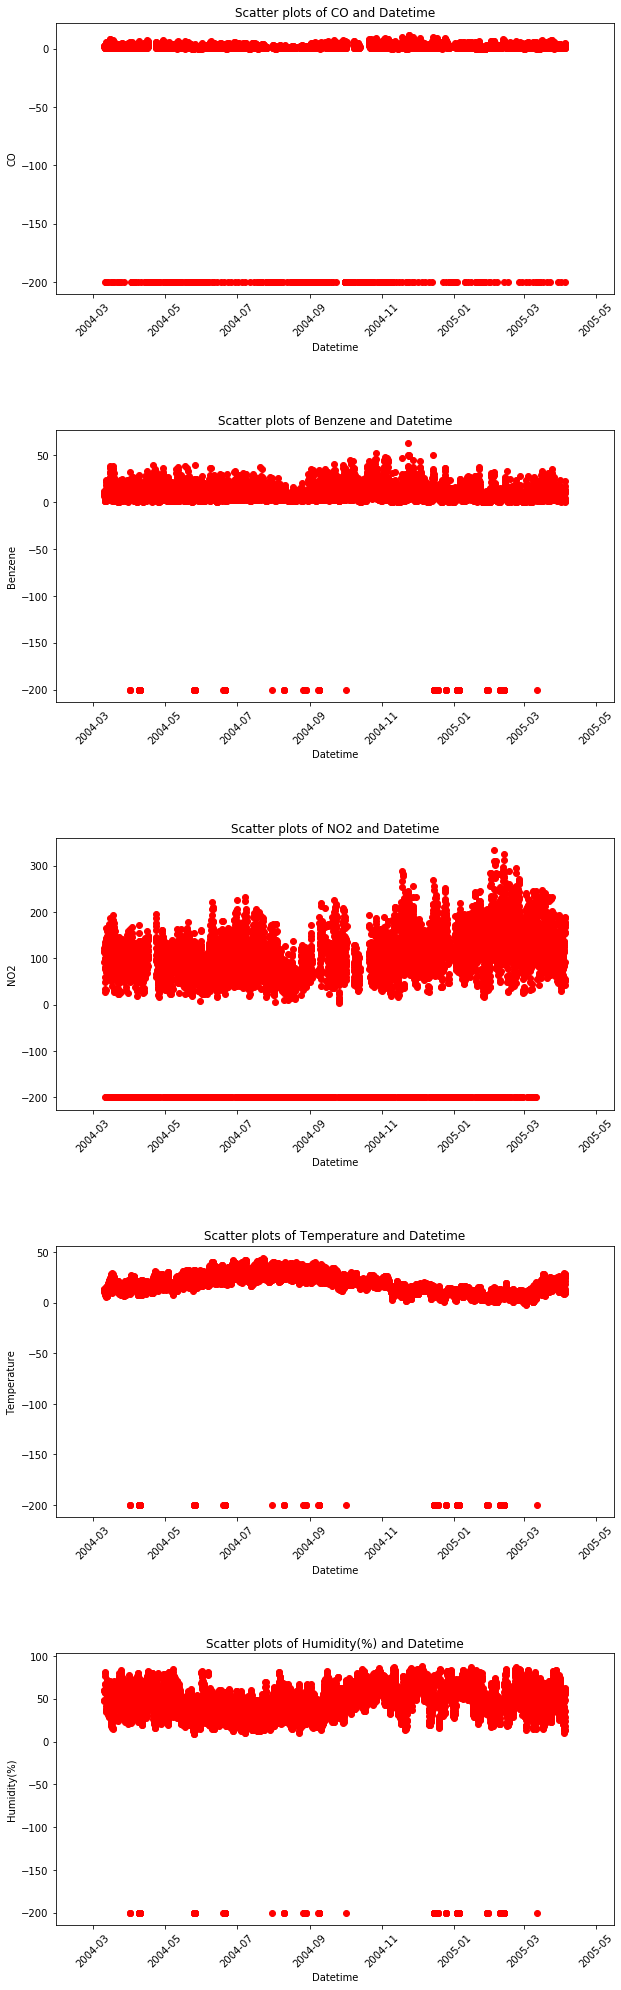

In [9]:
#your code
f, axs = plt.subplots(5,1,figsize=(10,35),gridspec_kw={'hspace': 0.5})
columns_no_datetime = [x for x in air_pollution_data_q1.columns if x != "Datetime"]
for ax,c in zip(axs.flat,columns_no_datetime):
    ax.set_title(f'Scatter plots of {c} and Datetime')
    ax.scatter(air_pollution_data_q1["Datetime"], air_pollution_data_q1[c], color='r')
    ax.set(xlabel='Datetime', ylabel=c)
    plt.setp(ax.get_xticklabels(), rotation=45)
plt.show()

In [10]:
print("Verifying existance of NaN.")
air_pollution_data_q1.isnull().sum()

Verifying existance of NaN.


CO             0
Benzene        0
NO2            0
Temperature    0
Humidity(%)    0
Datetime       0
dtype: int64

Explanation:
</br><font color="green"><b>By using a scatter plot on each attribute in our dataset, we see some inconsistencies in our data distribution. In all attributes we see some values arround -200. Based on the information given about the dataset that we are exploring, we can say that the automated device gives -200 instead of NaN. In other words -200 means no information.</b></font>

(d) We need to handle any implausible or missing data. In the lecture, several strategies to do so have been introduced, for example, deleting data rows that contain missing/implausible values or replacing them by a value derived from other data points. 

In this question, consider implausible values to be the ones identified in question (c).

    1) For all numerical features, compute and show mean, standard deviation, minimum and maximum, while ignoring the missing and implausible values. Also, print the total number of data rows.
    
    2) Choose a strategy (or combination of strategies) to handle missing/implausible values. Create a cleaned data set with all those values handled accordingly.
    
    3) For all numerical features, compute and show mean, standard deviation, minimum and maximum with respect to your cleaned data set. Also print the total number of data rows.
    
    4) Motivate and explain your strategy and describe its (dis-)advantages compared to other options. Compare the computed statistical values before and after cleaning and briefly describe and evaluate any changes.

In [11]:
### Answer for 1)
q1data_c = air_pollution_data_q1.copy()
q1data_c = q1data_c.replace(-200, np.nan).dropna()
x = PrettyTable()
x.field_names = ["Feature name", "Mean", "Std", "Min", "Max"]
for c in air_pollution_data_q1.columns:
    if c in ["Datetime"]:
        continue
    x.add_row([c,np.mean(q1data_c[c]),np.std(q1data_c[c]),np.min(q1data_c[c]),np.max(q1data_c[c])])
print(x)
print("Number of rows in DataSet: "+str(q1data_c.shape[0]))

+--------------+--------------------+--------------------+------+-------+
| Feature name |        Mean        |        Std         | Min  |  Max  |
+--------------+--------------------+--------------------+------+-------+
|      CO      | 2.1792954363490793 | 1.438799701018495  | 0.1  |  11.9 |
|   Benzene    | 10.54382706164932  | 7.470599910029237  | 0.2  |  63.7 |
|     NO2      | 113.54347477982385 | 47.12692679603621  | 3.0  | 333.0 |
| Temperature  |  17.7857806244996  | 8.857734198722666  | -1.9 |  44.3 |
| Humidity(%)  | 48.89713370696557  | 17.442914871497486 | 9.2  |  88.7 |
+--------------+--------------------+--------------------+------+-------+
Number of rows in DataSet: 6245


Number of NaN values in CO : 1511
Number of NaN values in Benzene : 340
Number of NaN values in NO2 : 1483
Number of NaN values in Temperature : 340
Number of NaN values in Humidity(%) : 340


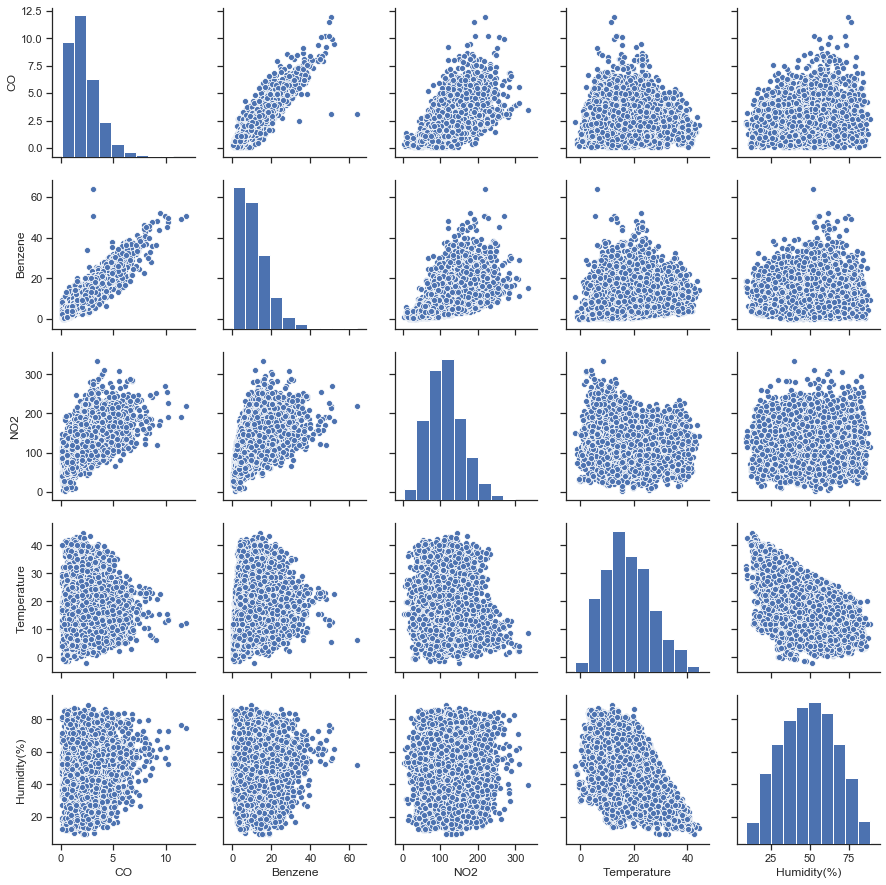

In [12]:
### This Column is special for some data verification before starting in data cleaning.

for c in columns_no_datetime:
    print(f"Number of NaN values in {c} : {air_pollution_data_q1[c].shape[0]-air_pollution_data_q1[air_pollution_data_q1[c]>-200][c].shape[0]}")

sns.set(style="ticks")
sns.pairplot(q1data_c[columns_no_datetime])

In [13]:
### Answer for 2)

q1data_c = air_pollution_data_q1.copy()
q1data_c = q1data_c.replace(-200, np.nan)
q1data_c["date"] = [x.date() for x in q1data_c["Datetime"]]
q1data_c["time"] = [x.time() for x in q1data_c["Datetime"]]

def get_correction_by_days(df, target, date, datedelta, time):
    subdf = df[
        (df.date >= date-datedelta) & (df.date <= date+datedelta) & (df.time == time)]
    return np.mean(subdf[target])

def data_corrector(dataframe, column_name):
    serie = dataframe[column_name].copy()
    datetime = dataframe["Datetime"]
    index_list = serie[serie.isna()].index
    for index in index_list:
        val_list = []
        if index > 0:
            diff = datetime[index] - datetime[index - 1]
            if diff.days == 0 and (diff.seconds // 3600) < 2 and (index-1) not in index_list:
                val_list.append(serie[index - 1])
        if index < len(serie):
            diff = datetime[index+1] - datetime[index]
            if diff.days == 0 and (diff.seconds // 3600) < 2 and (index+1) not in index_list:
                val_list.append(serie[index + 1])
        if len(val_list) == 2:
            serie[index] = np.mean(val_list)
        else:
            serie[index] = get_correction_by_days(dataframe, column_name, datetime[index].date(), timedelta(days=3),
                                                  datetime[index].time())
    return serie

print(f"Shape of the dataframe before data cleaning: {q1data_c.shape}")

# Step 1 : Removing all rows where all attributes = NaN

q1data_c.dropna(axis=0,how="all",subset=columns_no_datetime, inplace=True)
q1data_c = q1data_c.sort_values("Datetime").reset_index(drop=True)
print(f'Shape of the dataframe in step 1: {q1data_c.shape}')

# Step 2 : Correcting All attributes based on the mean of values in the hour before and hour after of the current instance or the mean of values in the 2 days before and 2 days after BUT in the same time.

for i in range(3):
    for c in columns_no_datetime:
        q1data_c[c] = data_corrector(q1data_c,c)

print(f'Shape of the dataframe in step 2: {q1data_c.shape}')

for c in columns_no_datetime:
    print(f"Number of NaN values in {c} : {q1data_c[c].isnull().values.any()}")


Shape of the dataframe before data cleaning: (8421, 8)
Shape of the dataframe in step 1: (8392, 8)
Shape of the dataframe in step 2: (8392, 8)
Number of NaN values in CO : False
Number of NaN values in Benzene : False
Number of NaN values in NO2 : False
Number of NaN values in Temperature : False
Number of NaN values in Humidity(%) : False


In [14]:
### Answer for 3)
del q1data_c["date"]
del q1data_c["time"]

x = PrettyTable()
x.field_names = ["Feature name", "Mean", "Std", "Min", "Max"]
for c in q1data_c.columns:
    if c in ["Datetime"]:
        continue
    x.add_row([c,np.mean(q1data_c[c]),np.std(q1data_c[c]),np.min(q1data_c[c]),np.max(q1data_c[c])])
print(x)
print("Number of rows in DataSet: "+str(q1data_c.shape[0]))

+--------------+--------------------+--------------------+------+-------+
| Feature name |        Mean        |        Std         | Min  |  Max  |
+--------------+--------------------+--------------------+------+-------+
|      CO      | 2.107582519065777  | 1.4200562032948147 | 0.1  |  11.9 |
|   Benzene    | 10.05052986971719  | 7.355358781787654  | 0.1  |  63.7 |
|     NO2      | 108.88178506646541 | 46.88530719451656  | 3.0  | 333.0 |
| Temperature  | 18.22492731172545  | 8.863809841335698  | -1.9 |  44.3 |
| Humidity(%)  |  49.1971427152844  | 17.14794103930926  | 9.2  |  88.7 |
+--------------+--------------------+--------------------+------+-------+
Number of rows in DataSet: 8392


Explanation:
</br><font color="green"><b>In this step of the assignment we followed two strategies in data correction.
</br></br>Step 1: Is to delete all the rows where all attributes have no data (datetime not included), if the row has at least one attribute with value different than -200 we will keep it for step 2. The idea behind this is that it makes no sense to keep a row with all attributes null, and they are few (About 29 rows).
</br></br>Step 2: Is to correct each row with the means of the value before and after, and that based on time. In first try we use an interval of -1 hour and +1 hour. Unlucky we found out, in some cases, that there is a succession of missing values for more than 3 hours and sometimes it keeps going the whole day. The solution that we proposed is to calculate the means by days but for the exactly same time (we chose here 2 days to keep the error rate smaller as possible), for example: We estimate the value of CO of current day at 14h by the value of 2 days before at 14h00 and two days after at 14h00.
</br></br>The strategies that we followed give us the advantage to keep most of data as possible (less data removing), the disadvantage is its time and resource consuming (for larger data), also the calculation that we made is just an estimation that could result in outliers.
</br></br>The good news is if we compare between the statistical values when we deleted all the rows, and after data cleaning. We can see that they are almost similar except a little difference in the means of NO2 and that's normal because this feature had a lot of missing value (about 1500 rows).</b></font>

<b><center>Image for reference : Original Data wihtout cleaning</center></b>

![alt text](data_no_cleaning.png "Data without cleaning")

<b><center>Image for reference : Data with all rows containing -200 deleted</center></b>

![alt text](before.png "Data with rows containing -200 deleted")

<b><center>Image for reference : After Data Cleaning</center></b>

![alt text](after.png "Before Data Cleaning")

## Question 2 - Data Preprocessing  and Advanced Visualization (15 points)

For this question, use the extracted data set you created in the preprocessing step ('air_pollution_2.csv').

In [15]:
data = pd.read_csv("air_pollution_2.csv",index_col=0).reset_index(drop=True)

(a) To create a suitable input for the following questions, modify the data set as listed below and then print the first 5 data rows:

    - Remove the columns 'Traffic_Volume' and 'Particulate_Matter'
    - Replace the columns 'Date' and 'Time' by a combined column 'Datetime' using the datetime data type
    - Restrict the data to the timeframe between 2004-04-01 and 2005-03-31
    - Drop all rows that contain a missing value or a value below -37
    
*Hint: You may be able to reuse some of your code or data sets created above.*

In [16]:
# Remove the columns 'Traffic_Volume' and 'Particulate_Matter'
del data["Traffic_Volume"]
del data["Particulate_Matter"]

# Replace the columns 'Date' and 'Time' by a combined column 'Datetime' using the datetime data type
data["Datetime"] = [datetime.strptime(f"{date} {time}","%d.%m.%y %H:%M:%S") for date,time in zip(data["Date"],data["Time"])]
del data["Date"]
del data["Time"]

#Restrict the data to the timeframe between 2004-04-01 and 2005-03-31
min_date = datetime.strptime('2004-04-01', '%Y-%m-%d')
max_date = datetime.strptime('2005-03-31', '%Y-%m-%d')
data = data[(data["Datetime"]>=min_date) & (data["Datetime"]<=max_date)]

#Drop all rows that contain a missing value or a value below -37
columns = [x for x in data.columns if x != "Datetime"]
for c in columns:
    data.drop(data[(data[c] < -37) | (data[c] == np.NaN)].index, inplace = True)
data = data.reset_index(drop=True)
data.head(5)

CO  Benzene  NO2  Temperature  Humidity(%)            Datetime
0  1.2      5.1   70         11.5         63.9 2004-04-01 01:00:00
1  2.5     14.3  120         26.8         45.1 2004-07-01 23:00:00
2  1.9      8.6  181          7.0         73.7 2005-02-21 16:00:00
3  3.5     14.1  262          6.0         78.0 2005-02-24 21:00:00
4  4.6     21.2  141         19.1         52.3 2004-05-13 20:00:00

(b) For temperature, humidity and CO compute the mean value for each month. Create two stream graphs based on this newly computed data, that visualize the change in temperature, CO and humidity over the months:

    1) For the first stream graph, simply use the mean values you computed for each month.
    2) For the second stream graph, first normalize the computed mean values by mapping them individually to an interval between 0 and 1, that is, apply Min-max normalization.

In [17]:
#your code
data_gr = data.copy()[["Temperature","Humidity(%)","CO","Datetime"]]
data_gr.index = data_gr.Datetime
data_gr = data_gr.groupby([data_gr.index.year,data_gr.index.month]).mean()
data_gr.index = [f"{i[0]}-{i[1]}" for i in data_gr.index]
data_gr["Datetime"] = pd.to_datetime(data_gr.index)
data_gr.reset_index(drop=True,inplace=True)
data_gr

Temperature  Humidity(%)        CO   Datetime
0     16.805955    48.999752  2.340695 2004-04-01
1     20.840270    42.350867  1.969171 2004-05-01
2     27.169727    38.186133  1.985156 2004-06-01
3     29.517427    32.933817  1.824481 2004-07-01
4     30.031522    41.701630  1.281793 2004-08-01
5     23.749875    43.709524  2.304010 2004-09-01
6     21.229769    64.091040  2.807225 2004-10-01
7     13.855420    58.955420  2.797552 2004-11-01
8     11.429167    58.656458  2.643333 2004-12-01
9      8.511132    56.459369  2.130983 2005-01-01
10     7.281474    51.203586  1.997211 2005-02-01
11    13.243186    50.854516  2.072742 2005-03-01

In [18]:
import altair as alt
alt.Chart(data_gr).transform_fold(
    ['Temperature','Humidity(%)','CO'],
    as_=['Measurement','Value']
).mark_area(
    opacity=0.5
).encode(
    alt.X('Datetime:T',scale=alt.Scale(zero=False)),
    alt.Y('Value:Q', stack='center',scale=alt.Scale(zero=False)),
    alt.Color('Measurement:N')
).properties(
    width=500,
    height=500
)

alt.Chart(...)

<b><font color="red">Please, if the graph didn't show up for Altair library issue see the image stream_graph_1.png in attached files</font></b>

In [19]:
# 2) For the second stream graph, first normalize the computed mean values by mapping them individually to an interval between 0 and 1, that is, apply Min-max normalization.
dt =  data_gr["Datetime"].copy()
del data_gr["Datetime"]
data_gr = pd.DataFrame(MinMaxScaler().fit_transform(data_gr),columns=["Temperature","Humidity(%)","CO"])
data_gr["Datetime"] = dt
alt.Chart(data_gr).transform_fold(
    ['Temperature','Humidity(%)','CO'],
    as_=['Measurement','Value']
).mark_area(
    opacity=0.5
).encode(
    alt.X('Datetime:T',scale=alt.Scale(zero=False)),
    alt.Y('Value:Q', stack='center',scale=alt.Scale(zero=False)),
    alt.Color('Measurement:N')
).properties(
    width=500,
    height=500
)


alt.Chart(...)

<b><font color="red">Please, if the graph didn't show up for Altair library issue see the image stream_graph_2.png in attached files</font></b>

(c) Answer the following questions based on the stream graphs created in question 2(a) and briefly explain how you derived the answer. Which of the two stream graphs do you consider more adequate to obtain the answers?

    1) In which month is the average CO lowest?
    
    2) Is there any correlation between humidity and CO?
    
    3) Between which months is temperature increasing?

1) In which month is the average CO lowest?
        </br><font color="green"><b> The month where the average CO is lowest is the 8th month of the year (August), because we see from the graph 
    that it has the lowest area of representation in the graph.
   </b></font>
        
2) Is there any correlation between humidity and CO?
        </br><font color="green"><b> The graph shows no correlation between humidity and CO, the two measurements change independetly of each others.</b></font>
    
3) Between which months is temperature increasing?
        </br><font color="green"><b> The temperature starts increasing in February until August then starts to decrease.

Explanation: 
</br><font color="green"><b>
The second stream graph (witht scalled data) is more adequte to obtain answers. We can easilly read the changes in our measures (Temperature, CO, Humidity) without getting confused by which attribute has greater values than the other. Because for example a change in CO is not noticeable in the non scaled graph near a change in Humidity. </b></font>

(d) We want to create a heat map that visualizes the CO measured for different combinations of humidity and temperature. 
The heatmap should have 12 columns and 12 rows. The shown CO value should be the *median* of all values for the combination of humidity and temperature.

Modify the data as needed. Use a binning strategy of your choice for converting numerical data to categorical data. Motivate and explain all your choices and modifications.

In [20]:
#your code
sub_data = data.copy()[["Temperature","Humidity(%)","CO"]]
sub_data

Temperature  Humidity(%)   CO
0            11.5         63.9  1.2
1            26.8         45.1  2.5
2             7.0         73.7  1.9
3             6.0         78.0  3.5
4            19.1         52.3  4.6
...           ...          ...  ...
5726         18.9         42.1  0.6
5727          4.3         36.6  1.1
5728         13.2         68.4  3.9
5729         15.6         67.7  1.1
5730         22.2         38.3  2.0

[5731 rows x 3 columns]

In [21]:
temperature_cut = pd.cut(sub_data["Temperature"],12)
humidity_cut = pd.cut(sub_data["Humidity(%)"],12)
sub_data_joined = sub_data.join(pd.DataFrame({"Temperature_j":temperature_cut,"Humidity_j":humidity_cut})).groupby(["Temperature_j","Humidity_j"]).median()
sub_data_joined = sub_data_joined.unstack(level=0)
sub_data_joined = sub_data_joined.iloc[::-1]
sub_data_joined

Temperature                                       \
Temperature_j   (-1.946, 1.95] (1.95, 5.8] (5.8, 9.65] (9.65, 13.5]   
Humidity_j                                                            
(82.075, 88.7]             NaN         4.3        7.70        11.10   
(75.45, 82.075]           1.40         4.4        7.95        11.70   
(68.825, 75.45]           1.80         4.9        7.70        11.80   
(62.2, 68.825]            1.30         4.2        7.95        12.40   
(55.575, 62.2]            1.40         3.7        7.25        11.60   
(48.95, 55.575]           1.20         4.3        8.00        11.70   
(42.325, 48.95]          -1.30         4.3        7.00        11.45   
(35.7, 42.325]            0.65         4.6        7.80        11.30   
(29.075, 35.7]            0.60         3.7        8.50        11.30   
(22.45, 29.075]            NaN         4.1        8.95        11.90   
(15.825, 22.45]            NaN         NaN        9.30        12.05   
(9.12, 15.825]             NaN         NaN         NaN        12.20   

                                                                         \
Temperature_j   (13.5, 17.35] (17.35, 21.2] (21.2, 25.05] (25.05, 28.9]   
Humidity_j                                                                
(82.075, 88.7]          13.90         19.95           NaN           NaN   
(75.45, 82.075]         15.20         18.20         21.70           NaN   
(68.825, 75.45]         15.80         19.20         21.80           NaN   
(62.2, 68.825]          14.60         19.90         22.35         25.60   
(55.575, 62.2]          15.20         19.50         23.00         26.10   
(48.95, 55.575]         15.70         18.95         23.20         26.50   
(42.325, 48.95]         15.60         19.80         22.70         26.40   
(35.7, 42.325]          15.80         19.60         23.70         27.10   
(29.075, 35.7]          15.20         19.40         23.50         26.90   
(22.45, 29.075]         14.60         19.70         23.35         26.80   
(15.825, 22.45]         14.60         18.20         22.45         27.10   
(9.12, 15.825]          15.05         19.85         24.50         26.85   

                                             ...          CO               \
Temperature_j   (28.9, 32.75] (32.75, 36.6]  ... (5.8, 9.65] (9.65, 13.5]   
Humidity_j                                   ...                            
(82.075, 88.7]            NaN           NaN  ...        2.80          2.6   
(75.45, 82.075]           NaN           NaN  ...        1.70          2.3   
(68.825, 75.45]           NaN           NaN  ...        1.90          1.7   
(62.2, 68.825]            NaN           NaN  ...        1.80          1.6   
(55.575, 62.2]            NaN           NaN  ...        2.45          1.8   
(48.95, 55.575]         29.40           NaN  ...        2.50          2.8   
(42.325, 48.95]         29.85           NaN  ...        1.70          2.8   
(35.7, 42.325]          30.00         33.55  ...        1.90          1.8   
(29.075, 35.7]          30.50         34.30  ...        1.60          1.5   
(22.45, 29.075]         30.80         34.40  ...        1.55          1.6   
(15.825, 22.45]         31.10         34.90  ...        1.40          2.0   
(9.12, 15.825]          31.80         35.35  ...         NaN          2.6   

                                                                         \
Temperature_j   (13.5, 17.35] (17.35, 21.2] (21.2, 25.05] (25.05, 28.9]   
Humidity_j                                                                
(82.075, 88.7]           1.55          4.85           NaN           NaN   
(75.45, 82.075]          1.60          1.60          1.50           NaN   
(68.825, 75.45]          2.10          2.00          3.15           NaN   
(62.2, 68.825]           2.00          2.20          1.95          0.75   
(55.575, 62.2]           2.20          2.25          2.20          1.60   
(48.95, 55.575]          1.80          2.10          1.85          1.50

(12.5, -0.5)

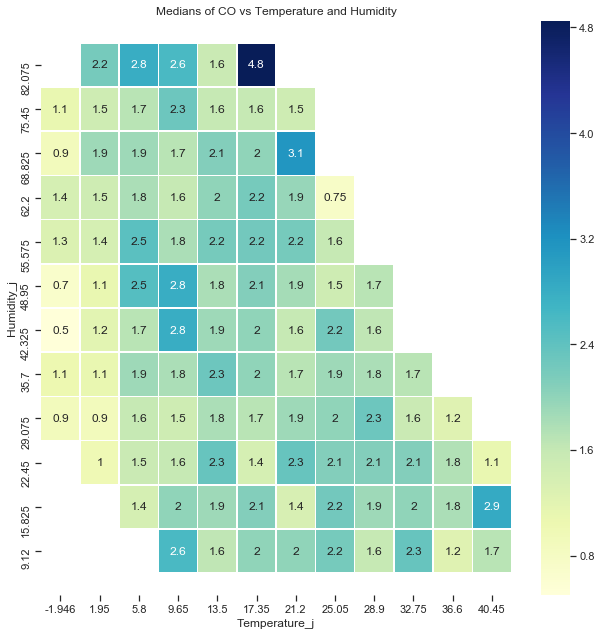

In [22]:
plt.figure(figsize=(9,9))
ax=sns.heatmap(sub_data_joined['CO'],annot=True,cmap="YlGnBu",linewidths=.5, xticklabels = sub_data_joined['CO'].columns.map(lambda x : x.left),
                        yticklabels = sub_data_joined['CO'].index.map(lambda x : x.left))
plt.title('Medians of CO vs Temperature and Humidity')
plt.tight_layout()
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

(e) Use the modified data to create a heat map as specified in question part (d). Answer the following questions based on that heat map and briefly explain how you derived your answer:

    1) For which combination of humidity and temperature values is the median CO highest? 
    
    2) How do you explain empty fields in your heat map?
    
    3) Is CO correlating with temperature, humidity, or both?

1) For which combination of humidity and temperature values is the median CO highest? 
    </br><font color="green"><b>The median of CO is highest in the respectively ranges of values (82.075, 88.7] and (17.475, 21.35] for 
           Humidity and Temperature.</b></font>

2) How do you explain empty fields in your heat map?
    </br><font color="green"><b>The empty fields are not defined values, this means there is no CO values for the combination of ranges 
    to infere a median from in the Dataset.</b></font>
    
3) Is CO correlating with temperature, humidity, or both?
    </br><font color="green"><b>There is no correlation between CO and Temperature or Humidity.</b></font>


Explanation: 
</br><font color="green"><b> We used a fixed width bining. we decided the number of bins to be 12 (the size of our heatmap)
than we binned our two features (Humidity and Temperature) into 12 equally-sized bins, for wich we calculated the median grouped by the values of the bins.</b></font>

## Question 3 - Clustering (15 points): 

(a) For this question, use the extracted data set you created in the preprocessing step ('air_pollution_2.csv'). Use a scatter diagram to find the relation between the 'Traffic_Volume' and 'Particulate_Matter' columns.

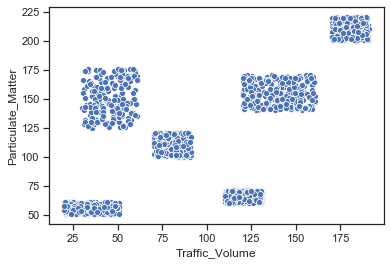

In [210]:
# Your code
data = pd.read_csv("air_pollution_2.csv",index_col=0).reset_index(drop=True)
sns.scatterplot(data["Traffic_Volume"],data["Particulate_Matter"])

(b) From the previous question you found the relationship between two columns which are suitable for applying clustering methods. Find the two arrays corresponding to these to columns and drop nan values from them. Apply the k_means method for clustering the two mentioned columns. Use three different number of clusters for classifying.

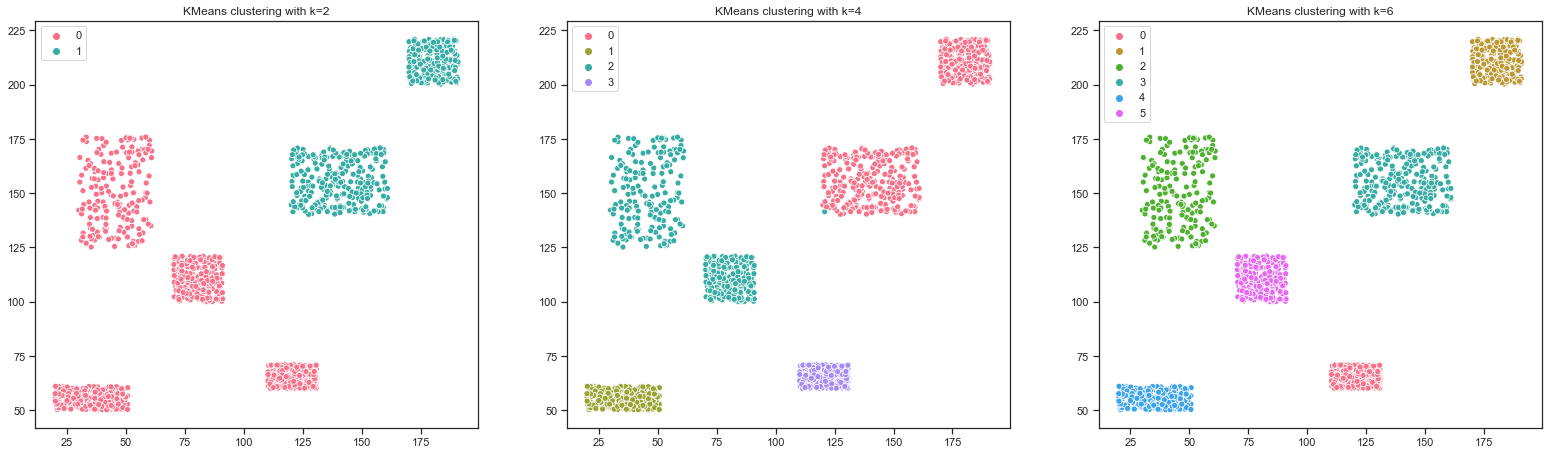

In [211]:
# Your code
X = data[["Traffic_Volume","Particulate_Matter"]].copy()
X.dropna(inplace=True)
X = X.values
from sklearn.cluster import KMeans
f, axs = plt.subplots(1,3,figsize=(27,7.5),gridspec_kw={'hspace': 1})
for ax,k in zip(axs.flat,[2,4,6]):
    kmeans = KMeans(n_clusters=k).fit(X)
    sns.scatterplot(X[:,0],X[:,1],hue=kmeans.labels_,palette=sns.color_palette("husl", len(set(kmeans.labels_))),ax=ax)
    ax.set_title(f"KMeans clustering with k={k}")
plt.show()

(c) Apply the DBSCAN method for clustering the two mentioned columns. Use three different eps and min_samples for clustering.

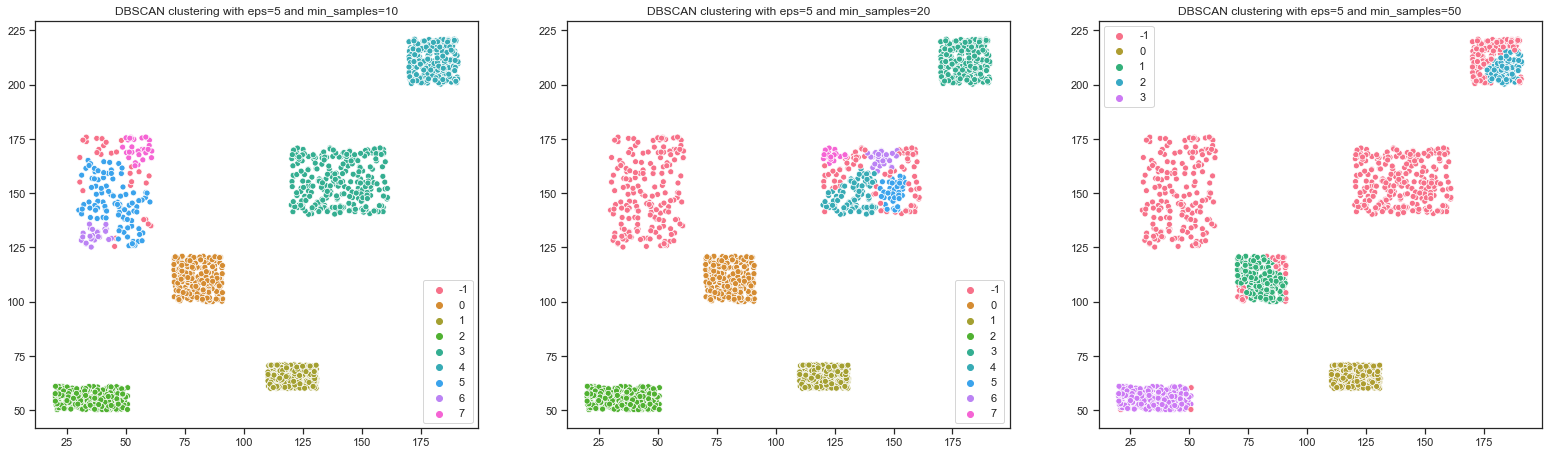

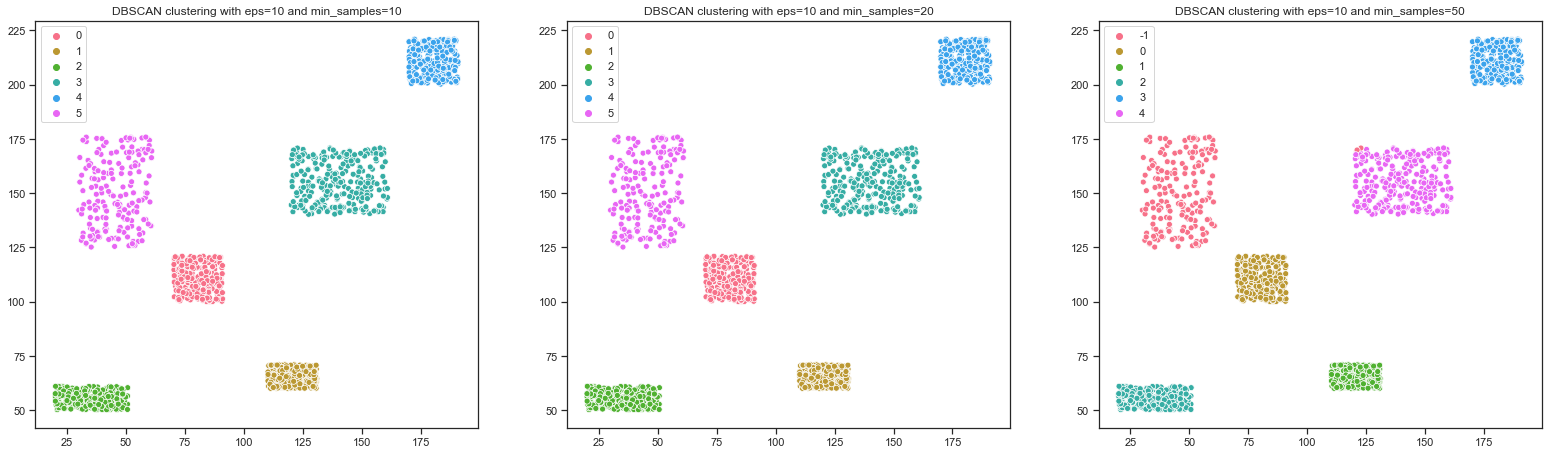

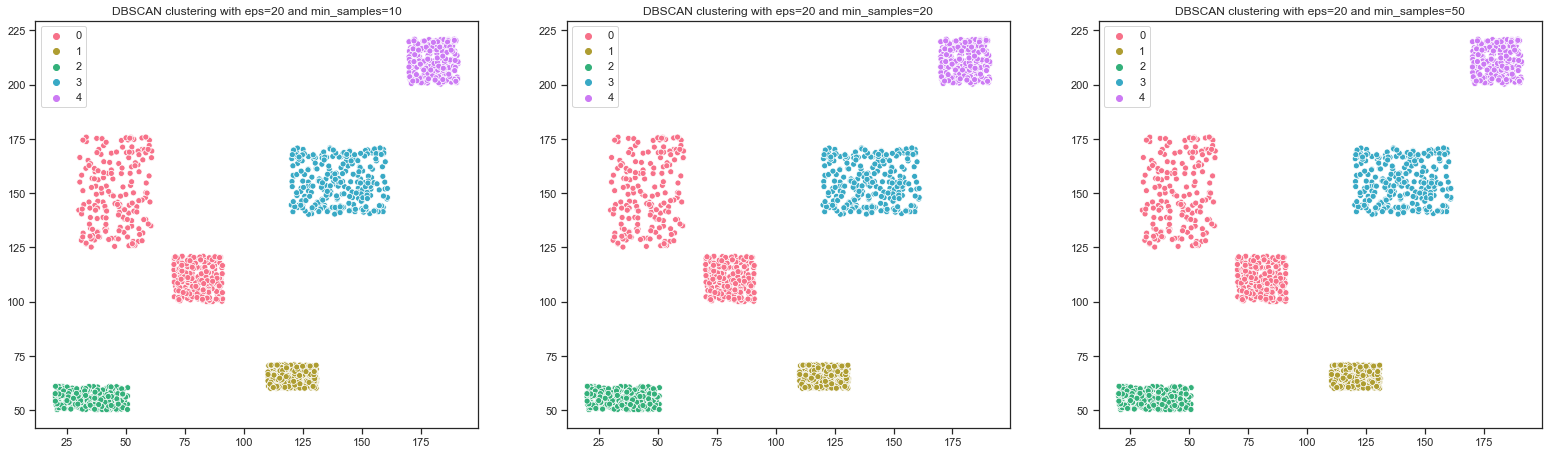

In [212]:
# Your code
from sklearn.cluster import DBSCAN
for eps in [5,10,20]:
    f, axs = plt.subplots(1,3,figsize=(27,7.5),gridspec_kw={'hspace': 1})
    for ax,m_s in zip(axs.flat,[10,20,50]):
        dbscan = DBSCAN(eps=eps,min_samples=m_s).fit(X)
        sns.scatterplot(X[:,0],X[:,1],hue=dbscan.labels_,palette=sns.color_palette("husl", len(set(dbscan.labels_))),ax=ax)
        ax.set_title(f"DBSCAN clustering with eps={eps} and min_samples={m_s}")
    plt.show()

(d) Compare k_means and DBSCAN results. Which of these methods is more suitable for clustering this data? Why?

Explanation: 
</br><font color="green"><b>Kmeans gives us a result depends on the number of k that we give. In our case we give 2,4 and 6 and the results were almost abvious as our data is already grouped. In the other hand DBSCAN give us each time a result depending on the given paramaters (eps and min_samples).
</br></br>We see that Kmeans is more suitable for this data because the algorithm of kmeans try to minimize the distance intra classes (the distance between each point of the same class) and maximize the distance inter-classes (the distance between different classes) and this is the case of our dataset, we have different groups of data where the distance intra-classes in minimal and the distance inter-classes is large and obvious. DBscan works better in more complicated cases where the distance between classes is not obvious, so we use the two parameters eps and min_samples to seperate between classes.</font></b>

(e) Add noise to the two mentioned columns. For adding noise, first find the range of these two columns and add a random number of 30 samples of noise in the range of each column to that. Plot the scatter diagram again.
Repeat k_means and DBSCAN algorithms for clustering. Which of these methods is more suitable for clustering this data? Why?

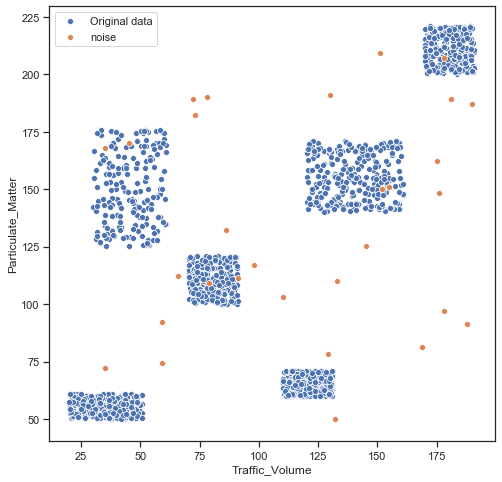

In [244]:
# Your code
X = data[["Traffic_Volume","Particulate_Matter"]].copy()
X = X.dropna().reset_index(drop=True)
noise_traffic_volume = np.random.choice(np.arange(X["Traffic_Volume"].min(),X["Traffic_Volume"].max()),30)
noise_Particulate_Matter = np.random.choice(np.arange(X["Particulate_Matter"].min(),X["Particulate_Matter"].max()),30)
fig, axs = plt.subplots(1,1,figsize=(8,8))
sns.scatterplot(X["Traffic_Volume"],X["Particulate_Matter"],ax=axs)
sns.scatterplot(noise_traffic_volume,noise_Particulate_Matter,ax=axs)
plt.legend(["Original data","noise"])
plt.show()
X = pd.concat([X,pd.DataFrame({"Traffic_Volume": noise_traffic_volume,"Particulate_Matter":noise_Particulate_Matter})],ignore_index=True)
X = X.values

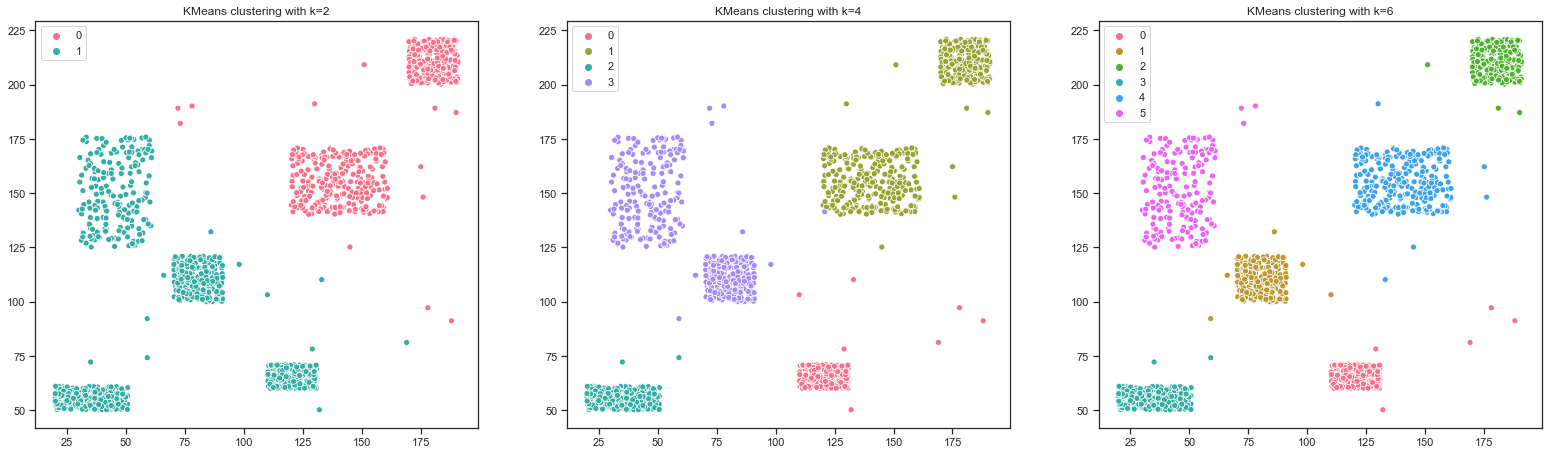

In [245]:
# Kmeans clustering in noisy data
f, axs = plt.subplots(1,3,figsize=(27,7.5),gridspec_kw={'hspace': 1})
for ax,k in zip(axs.flat,[2,4,6]):
    kmeans = KMeans(n_clusters=k).fit(X)
    sns.scatterplot(X[:,0],X[:,1],hue=kmeans.labels_,palette=sns.color_palette("husl", len(set(kmeans.labels_))),ax=ax)
    ax.set_title(f"KMeans clustering with k={k}")

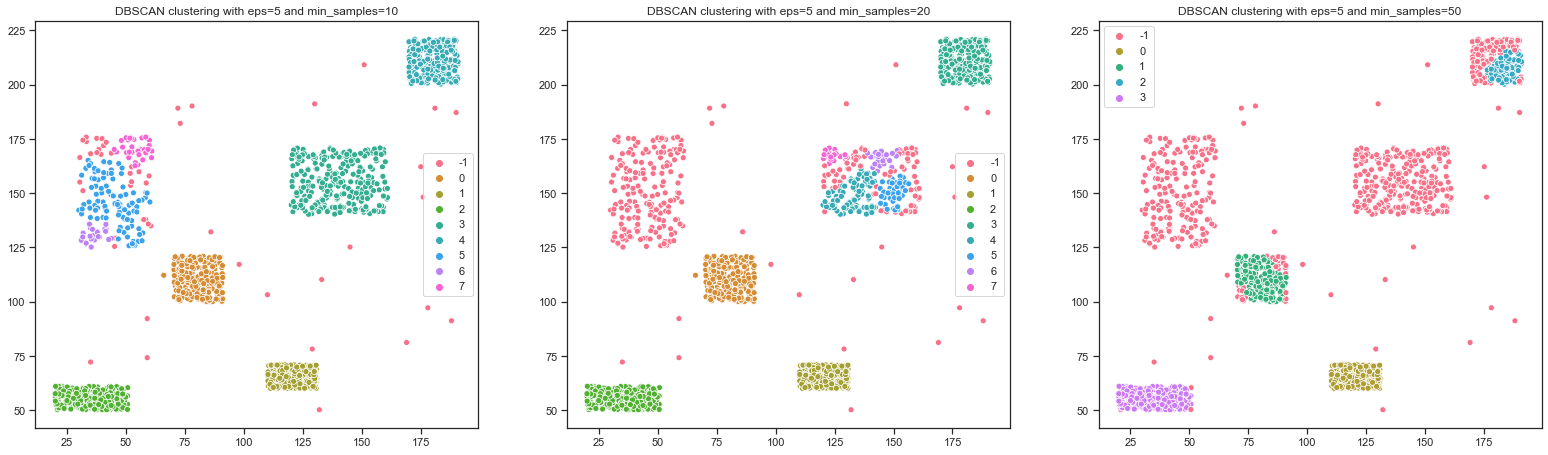

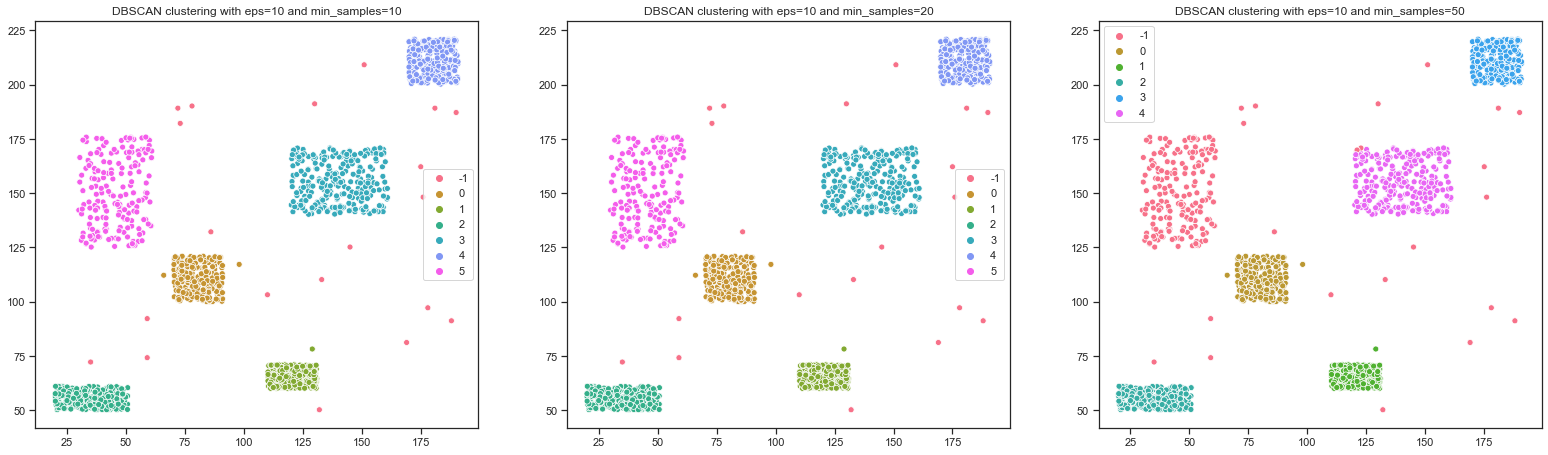

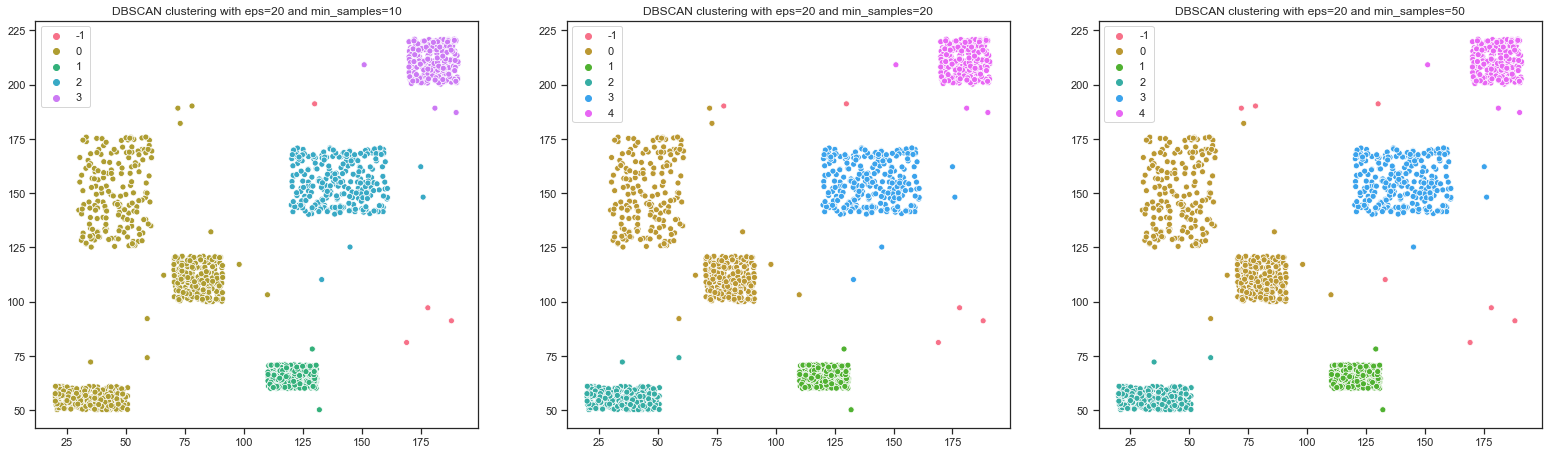

In [246]:
for eps in [5,10,20]:
    f, axs = plt.subplots(1,3,figsize=(27,7.5),gridspec_kw={'hspace': 1})
    for ax,m_s in zip(axs.flat,[10,20,50]):
        dbscan = DBSCAN(eps=eps,min_samples=m_s).fit(X)
        sns.scatterplot(X[:,0],X[:,1],hue=dbscan.labels_,palette=sns.color_palette("husl", len(set(dbscan.labels_))),ax=ax)
        ax.set_title(f"DBSCAN clustering with eps={eps} and min_samples={m_s}")
    plt.show()

Explanation:
</br><font color="green"><b>In this kind of data DBScan is better (With the two parameters eps=10 and min_samples=20, DBScan almost detected all the noise that we added), because DBScan has the notion of noise and it's robust to outliers not as KMeans algorithm that is sensitive to outliers.</b></font>

## Question 4 - Frequent itemsets and association rules (15 points): 

(a) You should carry out some preprocessing steps before starting the analysis:
 - Select 90% of 'applications' dataset by random sampling. Use one of the group member's student number as a seed.
 - After completing this preprocessing step, export your final dataset as 'applications_2.csv' dataset and use that for the next steps of the assignment.
 - <font color='red'>Important!</font> Make sure that you submit your extracted dataset with your result in moodle.

In [248]:
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules as arule

In [249]:
# Your code
data_set = []
with open("applications.csv") as csvFile:
    reader = csv.reader(csvFile)
    for row in reader:
        data_set.append(list(filter(None, row)))
print("number of lines loaded: "+str(len(data_set)))
random.seed(403758)
data_set = random.sample(data_set,round(len(data_set)*0.9))
print("Number of lines after sampling: "+str(len(data_set)))
with open('applications_2.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    for row in data_set:
        writer.writerow(row)
te = TransactionEncoder()
te_ary = te.fit(data_set).transform(data_set)
data = pd.DataFrame(te_ary, columns = te.columns_)
data.head(5)

number of lines loaded: 13087
Number of lines after sampling: 11778


A_ACCEPTED  A_ACTIVATED  A_APPROVED  A_CANCELLED  A_DECLINED  A_FINALIZED  \
0       False        False       False        False        True        False   
1       False        False       False        False        True        False   
2        True        False       False         True       False         True   
3       False        False       False        False        True        False   
4       False        False       False        False        True        False   

   A_PARTLYSUBMITTED  A_PREACCEPTED  A_REGISTERED  A_SUBMITTED  ...  \
0               True          False         False         True  ...   
1               True          False         False         True  ...   
2               True           True         False         True  ...   
3               True           True         False         True  ...   
4               True          False         False         True  ...   

   O_SELECTED  O_SENT  O_SENT_BACK  W_Afhandelen leads  W_Beoordelen fraude  \
0       False   False        False                True                False   
1       False   False        False               False                False   
2        True    True         True               False                False   
3       False   False        False                True                False   
4       False   False        False               False                False   

   W_Completeren aanvraag  W_Nabellen incomplete dossiers  \
0                   False                           False   
1                   False                           False   
2                    True                            True   
3                    True                           False   
4                   False                           False   

   W_Nabellen offertes  W_Valideren aanvraag  W_Wijzigen contractgegevens  
0                False                 False                        False  
1                False                 False                        False  
2                 True                  True                        False  
3                False                 False                        False  
4                False                 False                        False  

[5 rows x 24 columns]

(b) Find the most frequent itemsets with the support of more than 0.4 by using the Apriori algorithm (Hint: When you are creating rows to make the data_set, you should use none_empty strings).

In [250]:
# Your code
frequent_itemset = apriori(data, min_support = 0.4, use_colnames = True)
frequent_itemset

support                                           itemsets
0   0.585074                                       (A_DECLINED)
1   1.000000                                (A_PARTLYSUBMITTED)
2   0.560876                                    (A_PREACCEPTED)
3   1.000000                                      (A_SUBMITTED)
4   0.560876                           (W_Completeren aanvraag)
5   0.585074                    (A_DECLINED, A_PARTLYSUBMITTED)
6   0.585074                          (A_SUBMITTED, A_DECLINED)
7   0.560876                 (A_PREACCEPTED, A_PARTLYSUBMITTED)
8   1.000000                   (A_SUBMITTED, A_PARTLYSUBMITTED)
9   0.560876        (A_PARTLYSUBMITTED, W_Completeren aanvraag)
10  0.560876                       (A_SUBMITTED, A_PREACCEPTED)
11  0.560876            (A_PREACCEPTED, W_Completeren aanvraag)
12  0.560876              (A_SUBMITTED, W_Completeren aanvraag)
13  0.585074       (A_SUBMITTED, A_DECLINED, A_PARTLYSUBMITTED)
14  0.560876    (A_SUBMITTED, A_PREACCEPTED, A_PARTLYSUBMITTED)
15  0.560876  (A_PREACCEPTED, A_PARTLYSUBMITTED, W_Completer...
16  0.560876  (A_SUBMITTED, A_PARTLYSUBMITTED, W_Completeren...
17  0.560876  (A_SUBMITTED, A_PREACCEPTED, W_Completeren aan...
18  0.560876  (A_SUBMITTED, A_PREACCEPTED, A_PARTLYSUBMITTED...

(c) Find the most frequent itemsets with the support of more than 0.4 by using the Apriori algorithm having more than 2 members.

In [251]:
# Your code
frequent_itemsets = apriori(data, min_support = 0.4, use_colnames = True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets[ (frequent_itemsets['length'] > 2) & (frequent_itemsets['support'] > 0.4)]

support                                           itemsets  length
13  0.585074       (A_SUBMITTED, A_DECLINED, A_PARTLYSUBMITTED)       3
14  0.560876    (A_SUBMITTED, A_PREACCEPTED, A_PARTLYSUBMITTED)       3
15  0.560876  (A_PREACCEPTED, A_PARTLYSUBMITTED, W_Completer...       3
16  0.560876  (A_SUBMITTED, A_PARTLYSUBMITTED, W_Completeren...       3
17  0.560876  (A_SUBMITTED, A_PREACCEPTED, W_Completeren aan...       3
18  0.560876  (A_SUBMITTED, A_PREACCEPTED, A_PARTLYSUBMITTED...       4

(d) Find the itemsets having min_confidence=0.3 and min_lift=1.2. Print support, confidence and lift of filtered rules in one table.

In [260]:
# Your code
rules = arule(frequent_itemsets, metric="lift", min_threshold=1.2)
data = rules[ (rules['confidence'] >= 0.3) & (rules['lift'] >= 1.2) ][["support","confidence","lift"]]
data

support  confidence      lift
0   0.560876         1.0  1.782925
1   0.560876         1.0  1.782925
2   0.560876         1.0  1.782925
3   0.560876         1.0  1.782925
4   0.560876         1.0  1.782925
5   0.560876         1.0  1.782925
6   0.560876         1.0  1.782925
7   0.560876         1.0  1.782925
8   0.560876         1.0  1.782925
9   0.560876         1.0  1.782925
10  0.560876         1.0  1.782925
11  0.560876         1.0  1.782925
12  0.560876         1.0  1.782925
13  0.560876         1.0  1.782925
14  0.560876         1.0  1.782925
15  0.560876         1.0  1.782925
16  0.560876         1.0  1.782925
17  0.560876         1.0  1.782925

## Question 5 - Text Mining (15 points)

Among the datasets given for this assignment you will find the files "pg_train" and "pg_test". These two files contain a labeled corpus, already splitted in training and test set.
The corpus consists of sentences from several novels, labeled with the name of the author. The first task is text classification: you will train a set of classifiers that predict the author of a piece of text.

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import utils
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
def text_cleaner(text_list,stemmer_on=True,stop_words_on=True):
    stop_words = set(stopwords.words('english'))
    tokenizer = RegexpTokenizer(r'\w+')
    stemmer = PorterStemmer()
    cleaned_data = []
    for line in text_list:
        cleaned_line = line.lower()  #all lowercase
        cleaned_line = tokenizer.tokenize(cleaned_line) #no punctuation using regex and tokenization
        if stemmer_on:
            cleaned_line = [stemmer.stem(word) for word in cleaned_line] #stemming
        if stop_words_on:
            cleaned_line = [word for word in cleaned_line if word not in stop_words] #stopword removal
        cleaned_data.append(' '.join(cleaned_line))
    return cleaned_data

In [5]:
# Your code
def split_data(data):
    X = []
    Y = []
    for row in data:
        sep = row.index("#")
        Y.append(row[:sep])
        X.append(row[sep+1:])
    return X,Y

train_data_set = []
test_data_set = []
text_file = open("pg_train.csv","r",encoding="latin-1")
for line in text_file:
    train_data_set.append(line)
train_data_set = list(filter(lambda x: len(list(x.strip()))>0,train_data_set))
train_data_set_X,train_data_set_Y = split_data(train_data_set)

text_file = open("pg_test.csv","r",encoding="latin-1")
for line in text_file:
    test_data_set.append(line)
test_data_set = list(filter(lambda x: len(list(x.strip()))>0,test_data_set))
test_data_set_X,test_data_set_Y = split_data(test_data_set)
print("Number of rows in train dataset: "+str(len(train_data_set_X)))
print("Number of rows in test dataset: "+str(len(test_data_set_X)))
train_analysis = pd.DataFrame(train_data_set_Y,columns=["y"])
for label in list(set(train_data_set_Y)):
    print(f"Number of rows in train dataset per label {label} = {train_analysis[train_analysis.y==label].size}")

Number of rows in train dataset: 4499
Number of rows in test dataset: 1505
Number of rows in train dataset per label chesterton = 1541
Number of rows in train dataset per label shakespeare = 896
Number of rows in train dataset per label austen = 2062


(a) Perform preprocessing on the training corpus (all lowercase, no punctuation, tokenization, stemming, stopword removal) and obtain a binary document-term matrix; train a logistic classifier with the author as target.

In [6]:
train_data_set_X_cleaned = text_cleaner(train_data_set_X)
vec_a = CountVectorizer()
X = vec_a.fit_transform(train_data_set_X_cleaned)
df = pd.DataFrame(X.toarray(), columns=vec_a.get_feature_names())
df = (df > 1) * 1

In [7]:
model_a = LogisticRegression().fit(df.values,train_data_set_Y)

(b) Perform preprocessing on the training corpus (all lowercase, no punctuation, tokenization, stemming, stopword removal) and obtain a document-term matrix of counts; train a logistic classifier with the author as target.


In [8]:
# Your code
train_data_set_X_cleaned = text_cleaner(train_data_set_X)
vec_b = CountVectorizer()
X = vec_b.fit_transform(train_data_set_X_cleaned)
df = pd.DataFrame(X.toarray(), columns=vec_b.get_feature_names())

In [9]:
model_b = LogisticRegression().fit(df.values,train_data_set_Y)

(c) Perform preprocessing on the training corpus (all lowercase, no punctuation, tokenization, stemming, stopword removal) and obtain a tf-idf scores document-term matrix; train a logistic classifier.


In [10]:
# Your code
train_data_set_X_cleaned = text_cleaner(train_data_set_X)
vec_c = TfidfVectorizer()
X = vec_c.fit_transform(train_data_set_X_cleaned)
df = pd.DataFrame(X.toarray(), columns=vec_c.get_feature_names())

In [11]:
model_c = LogisticRegression().fit(df.values,train_data_set_Y)

(d) Perform preprocessing on the training corpus (all lowercase, no punctuation, tokenization, stemming, stopword removal) and obtain a doc2vec embedding in order to reduce the dimension of the document vector to 300; use the doc2vec model you just trained to convert the training set to a set of document vectors; train a logistic classifier with the author as target.


In [12]:
# Your code
train_data_set_X_cleaned = text_cleaner(train_data_set_X)
train_documents = [TaggedDocument(words=words, tags=[tag]) for words, tag in zip([x.split() for x in train_data_set_X_cleaned],train_data_set_Y)]
doc2vec = Doc2Vec(dm=0, vector_size=300, workers=cores)
doc2vec.build_vocab([x for x in tqdm(train_documents)])
for epoch in range(30):
    doc2vec.train(utils.shuffle([x for x in tqdm(train_documents)]), total_examples=len(train_documents), epochs=1)
    doc2vec.alpha -= 0.002
    doc2vec.min_alpha = doc2vec.alpha

100%|██████████| 4499/4499 [00:00<00:00, 2651049.97it/s]


In [13]:
def vec_for_learning(model, docs):
    doc2vec_vectors = [model.infer_vector(doc.words) for doc in docs]
    targets = [doc.tags[0] for doc in docs]
    return doc2vec_vectors, targets
X,Y = vec_for_learning(doc2vec, train_documents)
model_d = LogisticRegression(max_iter=1000).fit(X,Y)

(e) Predict the classification with the four models on the test data.

In [14]:
# Your code
# Model A
test_data_set_X_cleaned = text_cleaner(test_data_set_X)
X = vec_a.transform(test_data_set_X_cleaned)
df = pd.DataFrame(X.toarray(), columns=vec_a.get_feature_names())
df = (df > 1) * 1
prediction_a = model_a.predict(df.values)

In [15]:
# Model B
test_data_set_X_cleaned = text_cleaner(test_data_set_X)
X = vec_b.transform(test_data_set_X_cleaned)
df = pd.DataFrame(X.toarray(), columns=vec_b.get_feature_names())
prediction_b = model_b.predict(df.values)

In [16]:
# Model C
test_data_set_X_cleaned = text_cleaner(test_data_set_X)
X = vec_c.transform(test_data_set_X_cleaned)
df = pd.DataFrame(X.toarray(), columns=vec_c.get_feature_names())
prediction_c = model_c.predict(df.values)

In [17]:
# Model D
test_data_set_X_cleaned = text_cleaner(test_data_set_X)
test_documents = [TaggedDocument(words=words, tags=[tag]) for words, tag in zip([x.split() for x in test_data_set_X_cleaned],test_data_set_Y)]
X,Y = vec_for_learning(doc2vec, test_documents)
prediction_d = model_d.predict(X)

(f) Obtain confusion matrices for the four different models.


In [18]:
# Your code
labels = list(set(test_data_set_Y))
for model,prediction in zip(["model A","model B","model C","model D"],[prediction_a,prediction_b,prediction_c,prediction_d]):
    print(f"\nConfusion Matrix for {model}:")
    print(pd.DataFrame(confusion_matrix(test_data_set_Y, prediction, labels=labels), index=labels, columns=labels))


Confusion Matrix for model A:
             chesterton  shakespeare  austen
chesterton          384           45      86
shakespeare          26          260      15
austen               59           60     570

Confusion Matrix for model B:
             chesterton  shakespeare  austen
chesterton          490            8      17
shakespeare           1          299       1
austen                7            5     677

Confusion Matrix for model C:
             chesterton  shakespeare  austen
chesterton          506            0       9
shakespeare           5          296       0
austen                9            0     680

Confusion Matrix for model D:
             chesterton  shakespeare  austen
chesterton          225           62     228
shakespeare          46          207      48
austen              134           58     497


(g) Obtain accuracy and f1-score for the four different models.


In [19]:
# Your code
x = PrettyTable(field_names=[
    'model', 'Accuracy', 'F1-score'
])
for model,prediction in zip(["model A","model B","model C","model D"],[prediction_a,prediction_b,prediction_c,prediction_d]):
    x.add_row([model, accuracy_score(test_data_set_Y, prediction) ,f1_score(test_data_set_Y, prediction, average="weighted")])
print(x) 

+---------+--------------------+--------------------+
|  model  |      Accuracy      |      F1-score      |
+---------+--------------------+--------------------+
| model A | 0.8066445182724252 | 0.8069836227071555 |
| model B | 0.9740863787375416 | 0.9740350249957705 |
| model C | 0.9847176079734219 | 0.9847406096558838 |
| model D | 0.6172757475083056 | 0.6104828615694381 |
+---------+--------------------+--------------------+


(h) Briefly comment on the quality of the predictions for the four models.

Explanation:
</br><font color="green"><b>The accuracy and the F1-score of the first model prediction based on binary document-term matrix is acceptable but not like counts document-term matrix or TFIDF that gives best result as one the properties of IDF is to give higher values to words that are discriminating between documents. The prediction of model D based on Doc embedding is not acceptable as the accuracy and F1-score are very low, this was expected as the Doc2Vec transforms each document to one vector of 300 features including context information. (Doc2vec will give better results for documents clustering)


(i) For the two authors Austen and Chesterton separately, build a bigram language model. You should use both training and test data to build the model. Do not perform stemming or stopword removal for this task, but do use the other preprocessing steps described in (a). Use both right and left padding, and manage unknown terms by using a dedicated token.

In [20]:
from nltk.util import ngrams
from nltk.lm.preprocessing import pad_both_ends
from nltk.lm.preprocessing import flatten
from nltk.lm.preprocessing import padded_everygram_pipeline
from nltk.lm import MLE

In [21]:
# Your code
data = train_data_set+test_data_set
data_X,data_Y = split_data(data)
data_X = text_cleaner(data_X,False,False)
data = pd.DataFrame({"corpus":data_X,"Author":data_Y})
data_austen = [x.split() for x in data[data.Author=="austen"].copy()["corpus"].values]
data_chesterton = [x.split() for x in data[data.Author=="chesterton"].copy()["corpus"].values]

In [22]:
# Austen Model
unigram_bigram_austen, vocab_austen= padded_everygram_pipeline(2, data_austen)
austen_model = MLE(2)
austen_model.fit(unigram_bigram_austen,vocab_austen)

In [23]:
# Chersterton Model
unigram_bigram_chesterton, vocab_chesterton = padded_everygram_pipeline(2, data_chesterton)
chesterton_model = MLE(2)
chesterton_model.fit(unigram_bigram_chesterton,vocab_chesterton)

(j) For each author, use the correspondent language models from (i) to generate, using MLE, a sentence of fifteen words starting from each of the following terms:

In [26]:
print("Austen Model results\n")
for i in ['She','They','It']:
    print(f'{i} {" ".join(austen_model.generate(num_words=15, text_seed=("<s>",i.lower())))}')

Austen Model results

She relied on their husbands and forget by the company of it don t let me
They were nobody is nothing of such as if i understand the morning and a narrow
It the girls were to the name she persuaded to this declaration was in love with


In [27]:
print("Chesterton Model results\n")
for i in ['she','they','it']:
    print(f'{i} {" ".join(austen_model.generate(num_words=15, text_seed=("<s>",i)))}')

Chesterton Model results

she was through a better plan he was a sudden recollection long outlived every day to
they met captain wentworth unshackled and acknowledged that if you speak to flatter myself and she
it struck by the completion after mrs weston that he had a favourite beaux before him


(k) Now, computer another two models (for Austen and Chesterton separately), build a trigram model with the same data as in (i). Use both right and left padding, and manage unknown terms by using a dedicated token.

In [28]:
# Austen Model
trigram_austen, vocab_austen = padded_everygram_pipeline(3, data_austen)
austen_model = MLE(3)
austen_model.fit(trigram_austen,vocab_austen)

In [29]:
# Chersterton Model
trigram_chesterton, vocab_chesterton = padded_everygram_pipeline(3, data_chesterton)
chesterton_model = MLE(3)
chesterton_model.fit(trigram_chesterton,vocab_chesterton)

(l) For each author, use the correspondent language models from (k) to generate, using MLE, a sentence of fifteen words starting from each of the same terms as question (j):

In [291]:
print("Austen Model results\n")
for i in ['She','They','It']:
    print(f'{i} {" ".join(austen_model.generate(num_words=15, text_seed=("<s>","<s>",i.lower())))}')

Austen Model results

She was at first too great a personage in highbury that airy cheerful happy looking highbury
They talked at first shed no tears but after a short account of them should be
It would take one of the admiral but there was deep in the most certain thing


In [290]:
print("Chesterton Model results\n")
for i in ['she','they','it']:
    print(f'{i} {" ".join(austen_model.generate(num_words=15, text_seed=(("<s>","<s>",i))))}')

Chesterton Model results

she was most natural that lucy s business to london at any time have appeared to
they were invited likewise and when this was all curiosity she saw only a couple of
it was from your manners assure myself as to have the subject was continued no farther


(m) Comment on the quality of the models and generated text. Which model performs better? In general, which differences are there in using trigrams as opposed to bigrams?

Explanation:
</br><font color="green"><b>The Trigram model has more accurate text than the bigram model. The bigram model text generation is unclear with many languages related inconsistencies. In general in n-gram models the far we go with the value n the more model generate better text (limited by sparseness). Trigram predict words given two prior words instead bigram predicts words given only one word

## Question 6 - Process Mining (15 points)
For this part, refer to the online docs of pm4py (https://pm4py.fit.fraunhofer.de/).
Important: if you did not do it in the instruction, you should make sure to have the latest pm4py version: to get it is sufficient to type `pip install pm4py --upgrade`.
In this section of the assignment you will be working with a real life event log, derived from the activity of the help desk department of an Italian software company. The data is contained in the file "event_log.xes".

<font color="red"><b>To solve this part of the assignment we used the official documentation of PM4PY (the given link) and http://pm4py.pads.rwth-aachen.de/documentation/ . You may find code copied from the both sources.</b></font>

In [12]:
from pm4py.objects.log.importer.xes import factory
log = factory.import_log('event_log.xes')

(a) Use the provided event log and identify the least frequent variant and the most frequent variant.

In [13]:
# Your code
from pm4py.statistics.traces.log import case_statistics

variants_count = case_statistics.get_variant_statistics(log)
variants_count = sorted(variants_count, key=lambda x: x['count'], reverse=True)
print(f"The most frequent variant : {variants_count[0]['variant']}")
print("\nThe least frequent variant :")
for var in variants_count[::-1]:
    if var["count"]>1:
        break
    print(var["variant"])

The most frequent variant : Assign seriousness,Take in charge ticket,Resolve ticket,Closed

The least frequent variant :
Assign seriousness,Assign seriousness,Assign seriousness,Assign seriousness,Resolve ticket,Take in charge ticket,Resolve ticket,Closed
Assign seriousness,Assign seriousness,Assign seriousness,Assign seriousness,Take in charge ticket,Resolve ticket,Closed
Assign seriousness,Assign seriousness,Assign seriousness,Assign seriousness,Take in charge ticket,Wait,Take in charge ticket,Resolve ticket,Closed
Assign seriousness,Assign seriousness,Assign seriousness,Resolve ticket,Resolve ticket,Closed
Assign seriousness,Assign seriousness,Assign seriousness,Take in charge ticket,Resolve ticket,Resolve ticket,Closed
Assign seriousness,Assign seriousness,Assign seriousness,Take in charge ticket,Resolve ticket,Take in charge ticket,Create SW anomaly,Resolve ticket,Take in charge ticket,Create SW anomaly,Resolve ticket,Closed
Assign seriousness,Assign seriousness,Assign seriousness

(b) Remove all the variants that contain less than 1% of the traces in the log. Create a new event log without these variants.

In [14]:
# Your code
from pm4py.algo.filtering.log.variants import variants_filter

traces_threshold = len(log)*0.01
variants_to_remove = [variant['variant'] for variant in variants_count if variant['count'] < traces_threshold]
filtered_log = variants_filter.apply(log, variants_to_remove, parameters={"positive": False})

(c) Use Inductive miner algorithm to discover the process model based on you new event log (the filtered log without the infrequent variants of question (b)).


In [15]:
# Your code
from pm4py.algo.discovery.inductive import factory as inductive_miner
tree = inductive_miner.apply_tree(filtered_log)
net, initial_marking, final_marking = inductive_miner.apply(filtered_log)

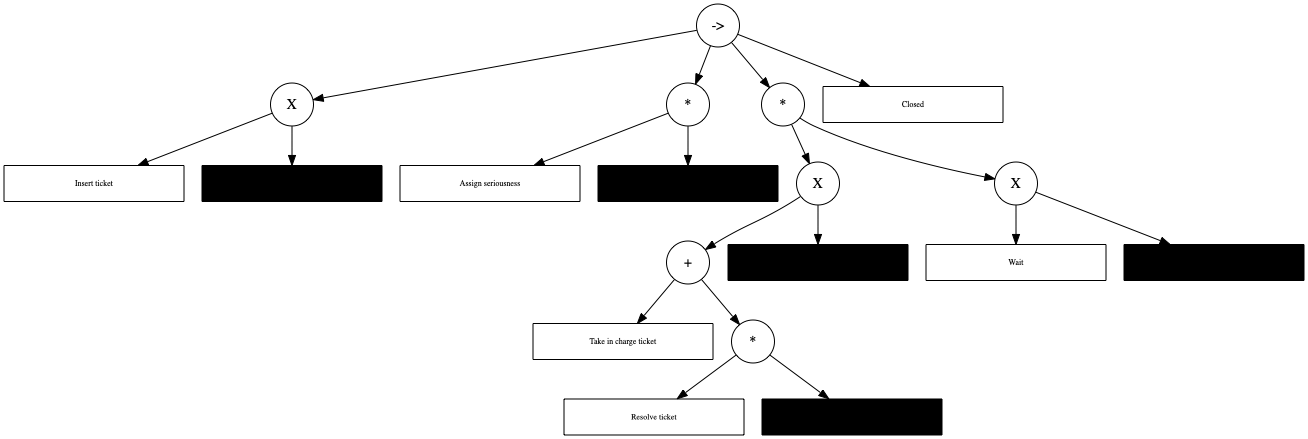

In [16]:
from pm4py.visualization.process_tree import factory as pt_vis_factory
gviz_tree = pt_vis_factory.apply(tree)
pt_vis_factory.view(gviz_tree)

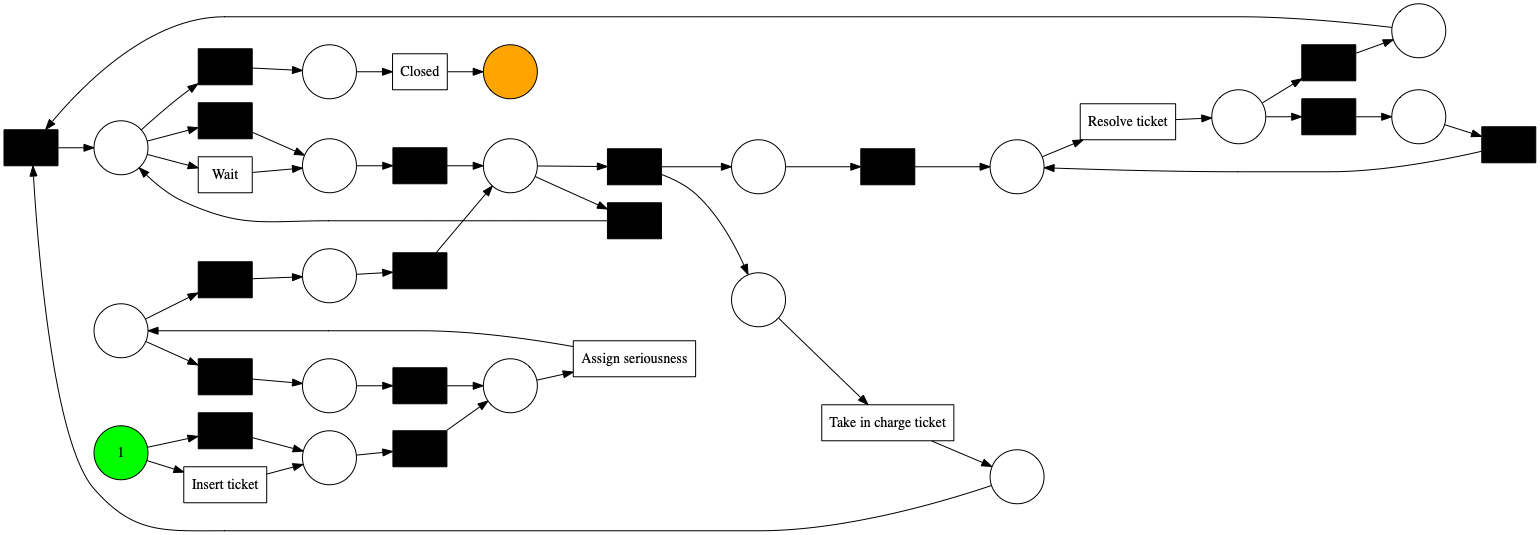

In [17]:
from pm4py.visualization.petrinet import factory as pn_vis_factory
gviz_pn = pn_vis_factory.apply(net, initial_marking, final_marking,log=filtered_log)
pn_vis_factory.view(gviz_pn)

(d) Perform the token replay conformance checking using your discovered model (c) and the original event log. Does your process model fit the log?


In [18]:
# Your code
from pm4py.algo.conformance.tokenreplay import factory as token_based_replay_factory
token_replay_result = token_based_replay_factory.apply(log, net, initial_marking, final_marking)
counter = [token for token in token_replay_result if token['trace_is_fit']]
print("%.2f" % (len(counter)/len(token_replay_result)*100))

65.26


Explanation:
</br><font color="green"><b>We have about 35% of traces in the log that they not fit our model. That means that our model could only reproduce all events correctly in 65% of traces. We can say that our process model doesn't fit the log

(e) Calculate the fitness of the model in (c).

In [19]:
# Your code
from pm4py.evaluation.replay_fitness import factory as replay_fitness_factory
fitness_tokenbasedreplay = replay_fitness_factory.apply(log, net, initial_marking, final_marking)
print(fitness_tokenbasedreplay)

{'percFitTraces': 62.99126637554585, 'averageFitness': 0.9387764189103065}


(f) Are there any deviations between the process model and the event log? If so, where and why?

Deviations found between the process model and the event log in 1591 traces


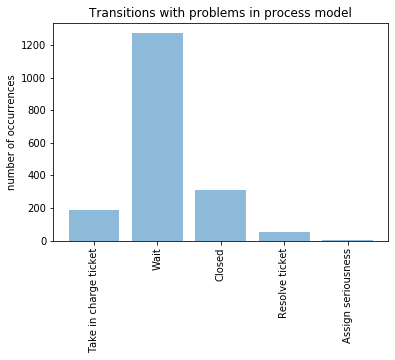

In [20]:
traces_with_problems=[(index,trace) for index,trace in enumerate(token_replay_result) if trace["trace_is_fit"]==False]
print("Deviations found between the process model and the event log in {} traces".format(len(traces_with_problems)))
transitions_freq = {}
source_problems = [trace["transitions_with_problems"] for i,trace in traces_with_problems]
for p in source_problems:
    for trans in p:
        if trans not in transitions_freq.keys():
            transitions_freq[trans]=1
        else:
            transitions_freq[trans]+=1

objects = list(transitions_freq.keys())
y_pos = np.arange(len(objects))
values = list(transitions_freq.values())

plt.bar(y_pos, values, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation=90)
plt.ylabel('number of occurrences')
plt.title('Transitions with problems in process model')
plt.show()

Explanation: </br><font color="green"><b>As the result we got in this part. We can confirm that there is deviations between the process model and the original log file. The model AVG fitness 94%, that means the model is unable to to explain 6% of the observed behavior. The most deviations are in "Wait" and in "Closed". The reason behind is either the transition is missing (closed for example) or the transition should not happen by model but happend in the reality (wait).

(g) Now use the original event log and remove the two most frequent variants, and discover the model based on your new event log (the filtered log without two most frequent variants).


In [21]:
# Your code
variants_to_remove = [variant['variant'] for variant in variants_count[:2]]
filtered_log = variants_filter.apply(log, variants_to_remove, parameters={"positive": False})
tree = inductive_miner.apply_tree(filtered_log)
net, initial_marking, final_marking = inductive_miner.apply(filtered_log)

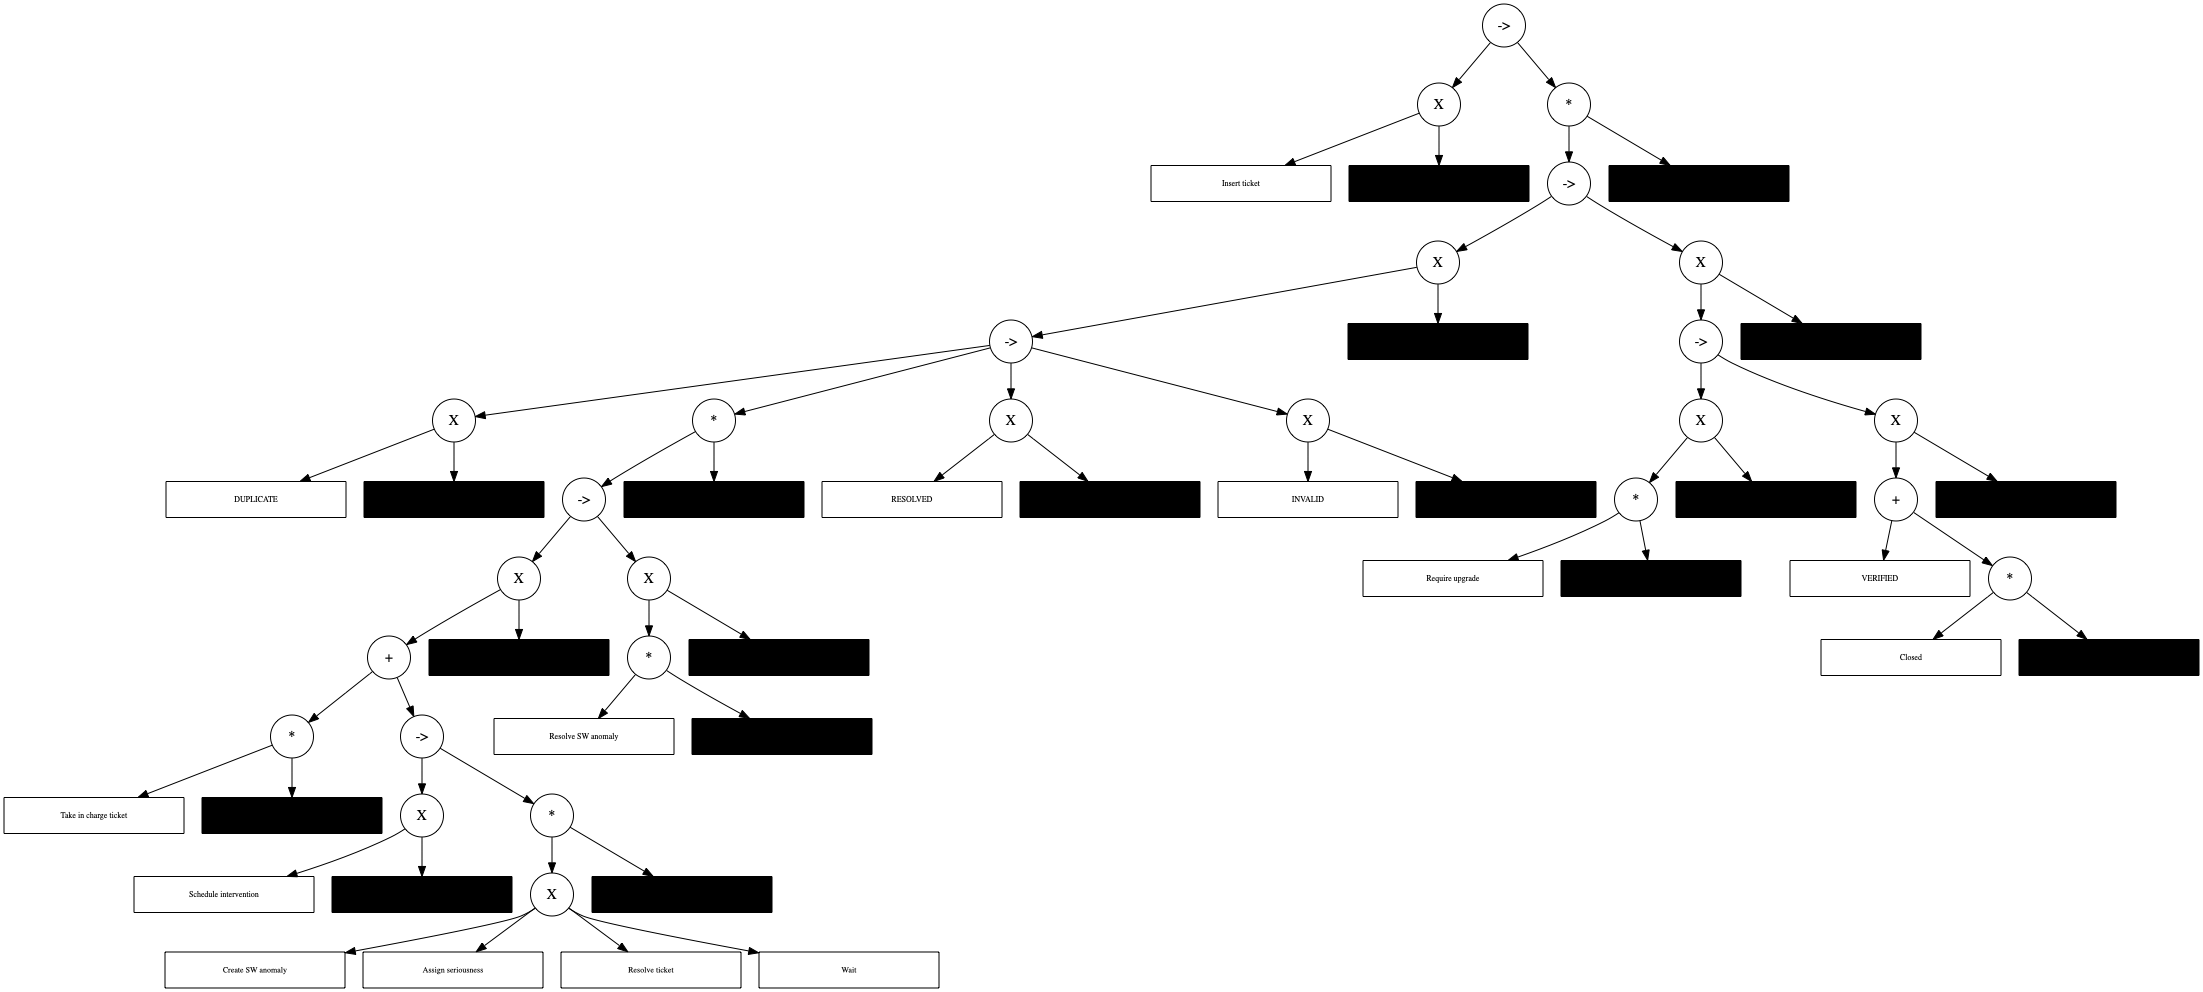

In [22]:
gviz_tree = pt_vis_factory.apply(tree)
pt_vis_factory.view(gviz_tree)

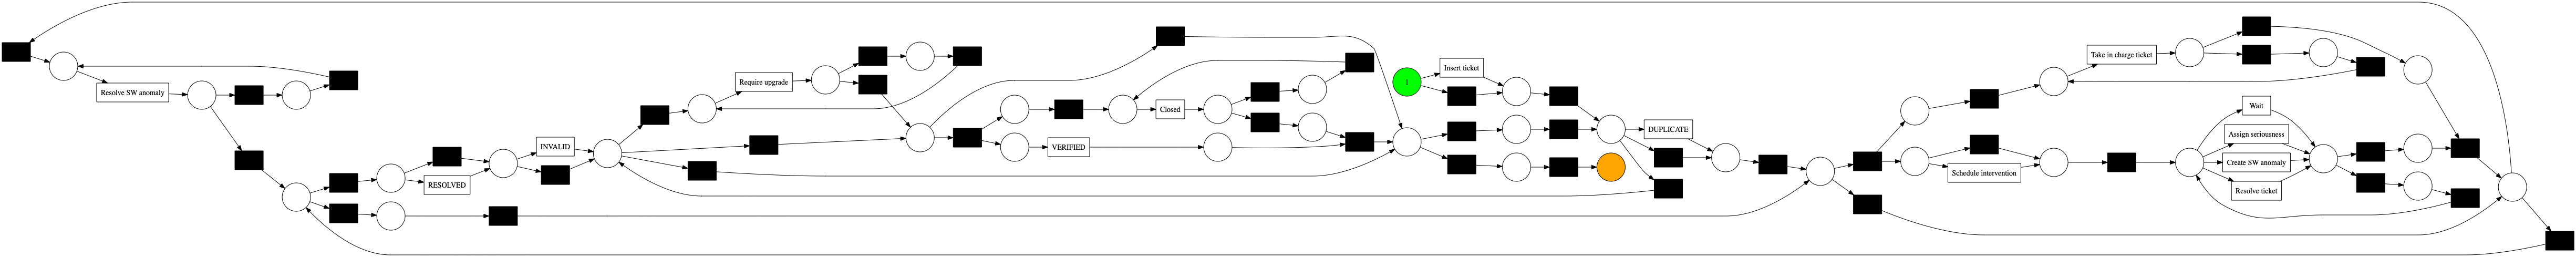

In [23]:
gviz_pn = pn_vis_factory.apply(net, initial_marking, final_marking, log=filtered_log)
pn_vis_factory.view(gviz_pn)

(h) Perform the token replay conformance checking using the newly discovered model of question (g) and the original event log. Does your process model fit the log?

In [34]:
# Your code
token_replay_result = token_based_replay_factory.apply(log, net, initial_marking, final_marking)
counter = [token for token in token_replay_result if token['trace_is_fit']]
print("%.2f" % (len(counter)/len(token_replay_result)*100))

91.79


Explanation:</br><font color="green"><b> No, The process model doesn't fit the log

(i) Calculate the fitness of the model in (g).

In [25]:
# Your code
fitness_tokenbasedreplay = replay_fitness_factory.apply(log, net, initial_marking, final_marking)
print(fitness_tokenbasedreplay)

{'percFitTraces': 0.2183406113537118, 'averageFitness': 0.752955974156862}


(j) Are there any deviations in the process model? If so, where and why?

Deviations found between the process model and the event log in 376 traces


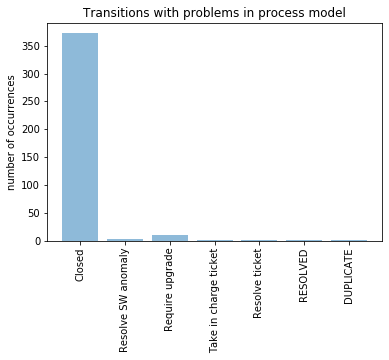

In [26]:
traces_with_problems=[(index,trace) for index,trace in enumerate(token_replay_result) if trace["trace_is_fit"]==False]
print("Deviations found between the process model and the event log in {} traces".format(len(traces_with_problems)))
transitions_freq = {}
source_problems = [trace["transitions_with_problems"] for i,trace in traces_with_problems]
for p in source_problems:
    for trans in p:
        if trans not in transitions_freq.keys():
            transitions_freq[trans]=1
        else:
            transitions_freq[trans]+=1

objects = list(transitions_freq.keys())
y_pos = np.arange(len(objects))
values = list(transitions_freq.values())

plt.bar(y_pos, values, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation=90)
plt.ylabel('number of occurrences')
plt.title('Transitions with problems in process model')
plt.show()

Explanation:
</br><font color="green"><b>As the result we got in this part. We can confirm that there is deviations between the process model and the original log file. The model AVG fitness 74%, that means the model is unable to to explain 26% of the observed behavior. The most deviations are in "Closed" and in "Require upgrade". The reason behind is either the transition is missing (closed for example) or the transition should not happen by model but happend in the reality (Require upgrade).

(k) Use the complete event log (original event log) and discover your process model using Inductive Miner.


In [27]:
# Your code
tree = inductive_miner.apply_tree(log)
net, initial_marking, final_marking = inductive_miner.apply(log)

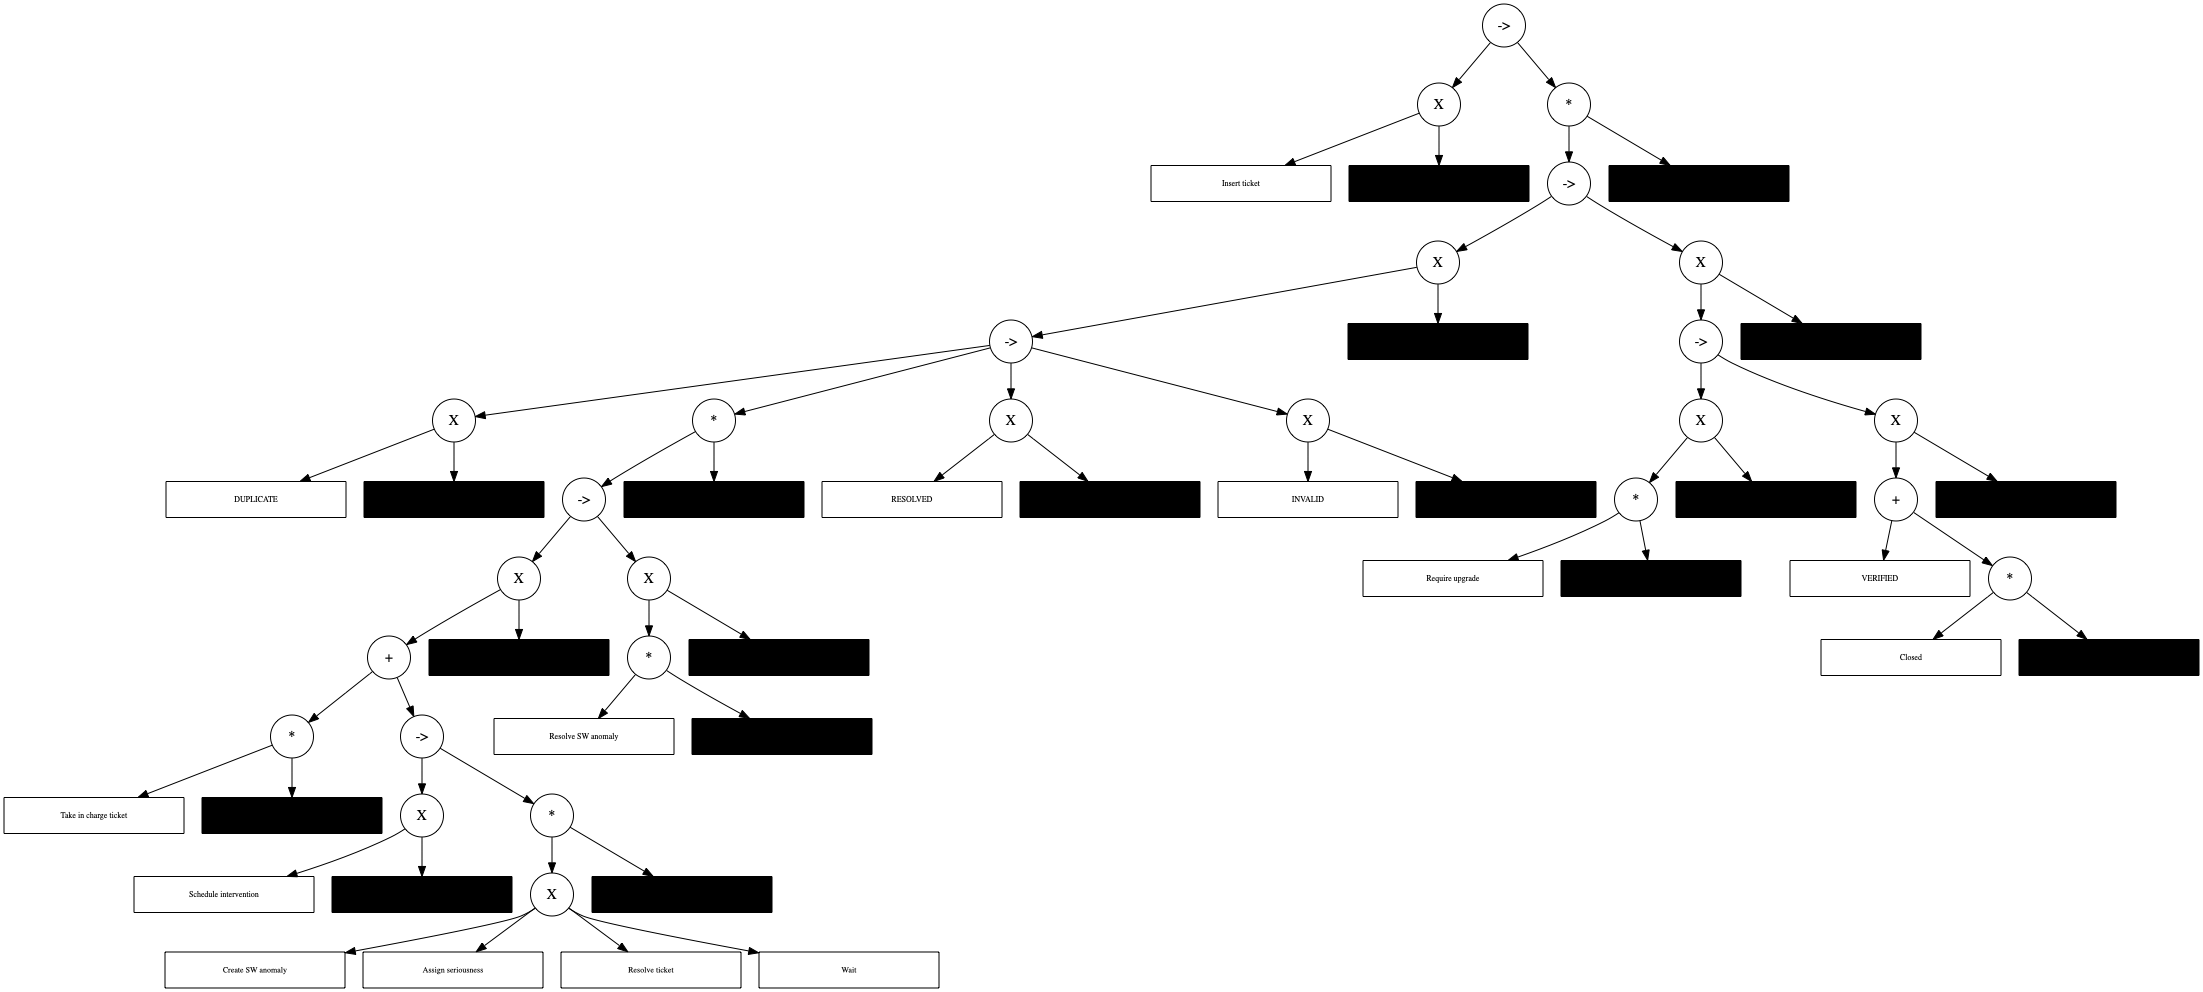

In [28]:
gviz_tree = pt_vis_factory.apply(tree)
pt_vis_factory.view(gviz_tree)

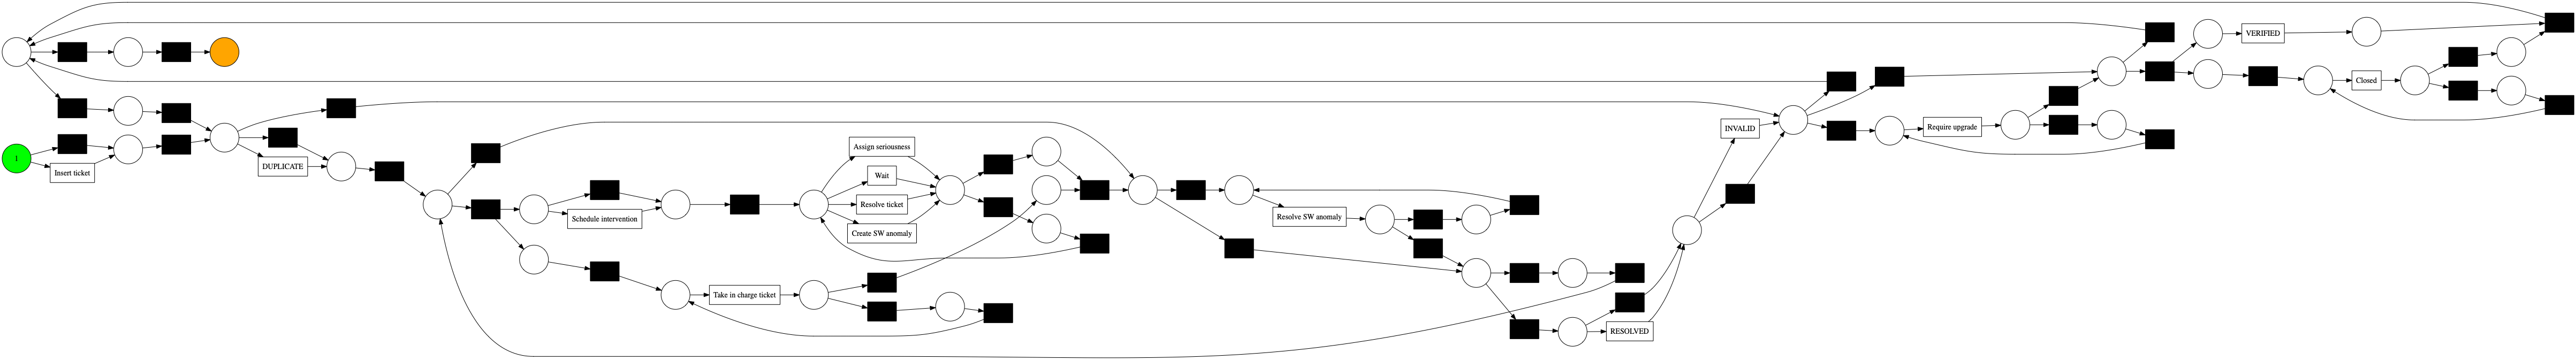

In [29]:
gviz_pn = pn_vis_factory.apply(net, initial_marking, final_marking,log=log)
pn_vis_factory.view(gviz_pn)

(l) Do the token replay conformance checking using your newly discovered model and the original event log. Does your process model fit the log?

In [30]:
# Your code
token_replay_result = token_based_replay_factory.apply(log, net, initial_marking, final_marking)
counter = [token for token in token_replay_result if token['trace_is_fit']]
print("%.2f" % (len(counter)/len(token_replay_result)*100))

91.79


In [31]:
fitness_tokenbasedreplay = replay_fitness_factory.apply(log, net, initial_marking, final_marking)
print(fitness_tokenbasedreplay)

{'percFitTraces': 0.2183406113537118, 'averageFitness': 0.752955974156862}


Explanation:</br><font color="green"><b> No, the process model doesn't fit the log

(m) How are these three discovered process models different from each other? Which model is the best fitting to the original log? Why?

Explanation:</br><font color="green"><b> The three models differ in percentage fitting traces and the average of fitness with some similarities between second and third model. We see that the best process model is the first one, because it gives the best AVG fitness and the best percentage fit traces.

(n) Visualize the model discovered in question (k) enriched with frequency information. Subsequently, visualize that same model enriched with performance information.

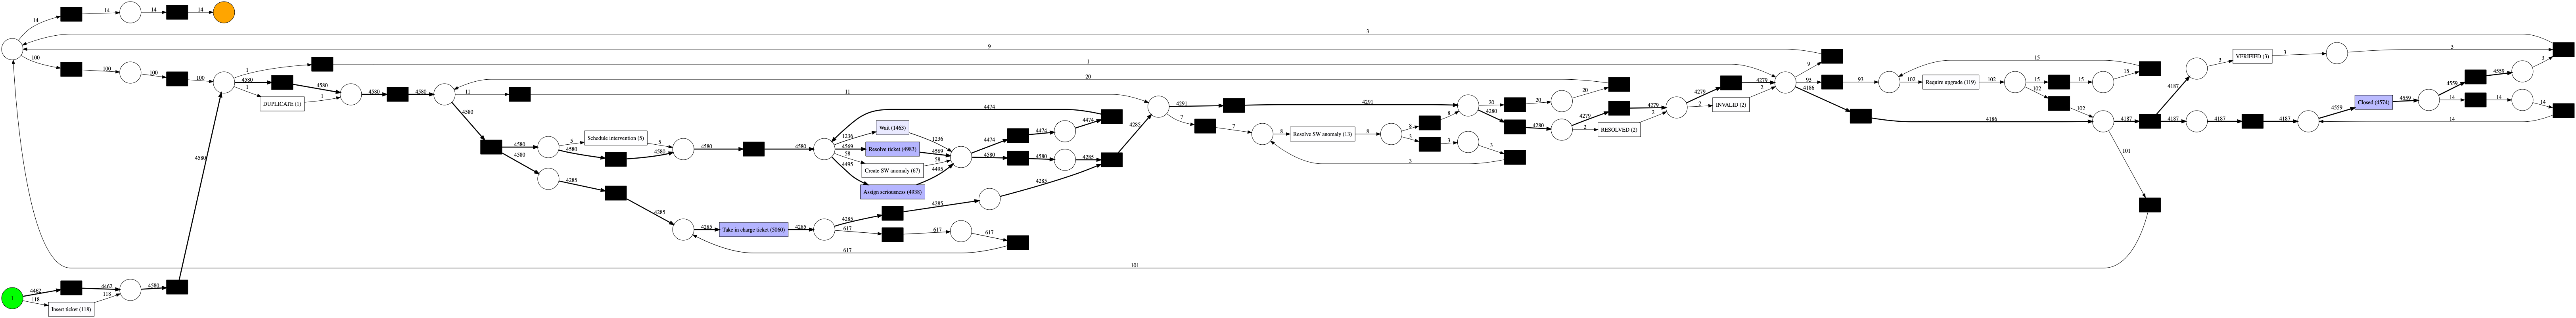

In [32]:
# Your code
gviz_pn = pn_vis_factory.apply(net, initial_marking, final_marking, variant="frequency",log=log)
pn_vis_factory.view(gviz_pn)

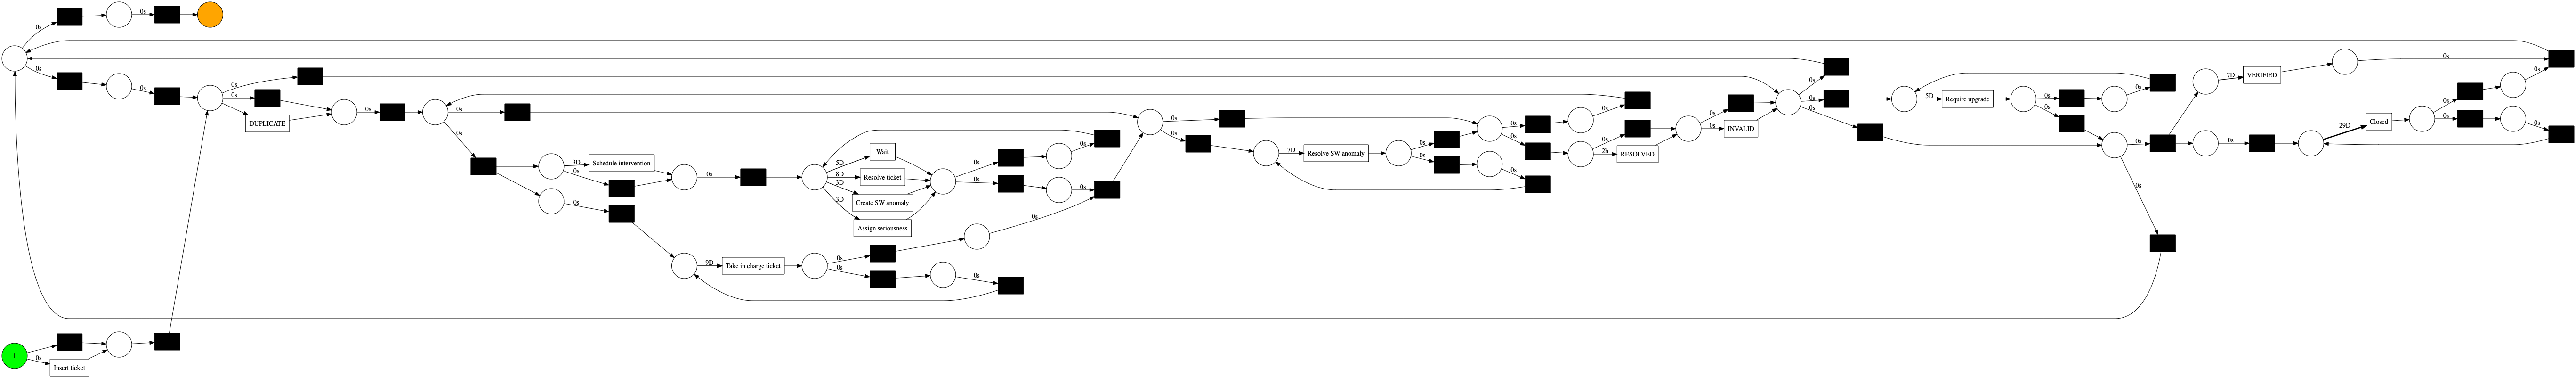

In [33]:
gviz_pn = pn_vis_factory.apply(net, initial_marking, final_marking, variant="performance",log=log)
pn_vis_factory.view(gviz_pn)

(o) If you were the process owner and you had more resources to hire employees, on which parts of the process would you assign them to maximize efficiency?

Explanation:
</br><font color="green"><b>I would hire more employees to: </br> + Take in charge ticket as it takes 9 days and number of occurence 5060 </br> + Resolve ticket 8 days and number of occurence is 4983 </br> + Assign seriousness it takes 3 days and number of occurence 4983

(p) Add your further comments and considerations on the frequency and performance informations. Does the process have a "happy path", and is it shown in the enhanced process models? Where are the major bottlenecks in this process? Is there any rework?

Explanation:
</br><font color="green"><b> The process has a happy path, and it's shown in the enhanced process model (insert ticket -> take in charge ticket -> resolve ticket -> closed). The major bottlenecks in this process are in :Take in charge ticket - resolve ticket - assign seriousness - wait. 
